#Data Preprocessing

In [ ]:
!pip install rdkit

In [ ]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from scipy.spatial.distance import mahalanobis
import matplotlib.pyplot as plt
from scipy.stats import trim_mean
from rdkit import DataStructs
from rdkit.Chem import AllChem
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import AffinityPropagation

In [ ]:
from google.colab import drive # use if file is on Google Drive in Google Colabs
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_pickle("description_df.pkl")
df

cid                                           cmpdname  \
0               1                                    Acetylcarnitine   
1               3  5,6-Dihydroxycyclohexa-1,3-diene-1-carboxylic ...   
2               4                                 1-Aminopropan-2-ol   
3               5                      3-Amino-2-oxopropyl phosphate   
4               6                        1-Chloro-2,4-dinitrobenzene   
...           ...                                                ...   
328390  168266256                                      CID 168266256   
328391  168266268                                      CID 168266268   
328392  168266335                                      CID 168266335   
328393  168266352                                      CID 168266352   
328394  168315038                                                NaN   

                                              cmpdsynonym         mw  \
0       Acetyl-DL-carnitine|acetylcarnitine|DL-O-Acety...    203.240   
1       5,6-dihydroxycyclohexa-1,3-diene-1-carboxylic ...    156.140   
2       1-Aminopropan-2-ol|1-AMINO-2-PROPANOL|78-96-6|...     75.110   
3       3-Amino-2-oxopropyl phosphate|3-amino-2-oxopro...    169.070   
4       1-chloro-2,4-dinitrobenzene|2,4-Dinitrochlorob...    202.550   
...                                                   ...        ...   
328390                                          9002-62-4   3417.600   
328391                                          8002-50-4   2867.500   
328392                           CID 162451877|64475-85-0  13508.655   
328393                CID 162301785|25038-44-2|68551-12-2    632.300   
328394                                                NaN   1134.100   

                       mf  polararea  complexity  xlogp  heavycnt  hbonddonor  \
0                C9H17NO4       66.4       214.0    0.4        14           0   
1                  C7H8O4       77.8       229.0   -0.3        11           3   
2                  C3H9NO       46.2        22.9   -1.0         5           2   
3                C3H8NO5P      110.0       162.0   -5.0        10           3   
4              C6H3ClN2O4       91.6       224.0    2.3        13           0   
...                   ...        ...         ...    ...       ...         ...   
328390   C160H194N22O54S4     1130.0      5660.0    NaN       240           4   
328391  C147H151Cl8N27O18      469.0      4770.0    NaN       200           4   
328392               Tb85        0.0         0.0    NaN        85           0   
328393    C26H30B2N10O4S2      225.0       427.0    NaN        44           2   
328394      C50H51N15O15S      478.0      2650.0    0.9        81          12   

        ...          meshheadings  \
0       ...       Acetylcarnitine   
1       ...                   NaN   
2       ...                   NaN   
3       ...                   NaN   
4       ...  Dinitrochlorobenzene   
...     ...                   ...   
328390  ...             Prolactin   
328391  ...                   NaN   
328392  ...                   NaN   
328393  ...                   NaN   
328394  ...                   NaN   

                                                annothits annothitcnt  \
0       Classification|Drug and Medication Information...           9   
1                       Classification|Literature|Patents           5   
2       Biological Test Results|Chemical and Physical ...          14   
3                       Classification|Literature|Patents           5   
4       Biological Test Results|Chemical and Physical ...          14   
...                                                   ...         ...   
328390                                                NaN           0   
328391                                                NaN           0   
328392                                                NaN           0   
328393                                                NaN           0   
328394                                                NaN      

In [ ]:
smiles_data = df["isosmiles"].tolist()[:10000]
smiles_data

['CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C',
 'C1=CC(C(C(=C1)C(=O)O)O)O',
 'CC(CN)O',
 'C(C(=O)COP(=O)(O)O)N',
 'C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl',
 'CCC(C)(C(C(=O)O)O)O',
 'C1(C(C(C(C(C1O)O)OP(=O)(O)O)O)O)O',
 'C(CCl)Cl',
 'C1=C(C=C(C(=C1O)O)O)O',
 'C1=CC(=C(C=C1Cl)Cl)Cl',
 'CCCCCC(=O)C=CC1C(CC(=O)C1CCCCCCC(=O)O)O',
 'CC12CCC(=O)CC1CCC3C2CCC4(C3CCC4O)C',
 'C1CCC(=O)NCCCCCC(=O)NCC1',
 'C1C=CC(=NC1C(=O)O)C(=O)O',
 'C(C(C(C(=O)C(=O)C(=O)O)O)O)O',
 'C1=CC(=C(C(=C1)O)O)C(=O)O',
 'C1=CC(=C(C(=C1)O)O)CCC(=O)O',
 'CCC(C(=O)C)(C(=O)O)O',
 'CC(=O)C(C)(C(=O)O)O',
 'C(=CC(=C(C(=O)O)N)C(=O)O)C=O',
 'C(=CC(=O)O)C=C(C(=O)O)N',
 'C(=O)C(C(=O)O)N',
 'C(=CC=O)C=C(C(=O)O)N',
 'CC(CO)(C(COP(=O)(O)O)O)O',
 'C(C=O)Cl',
 'C(CCl)O',
 'C1=CC(OC1=O)(CC(=O)O)Cl',
 'CC(C)C(C(C(=O)O)O)C(=O)O',
 'CC(C)(CO)C(=O)C(=O)O',
 'CC1(COC(=O)C1=O)C',
 'C1C(C(C(OC1O)CO)O)O',
 'C(CC(=O)O)C(C(=O)O)O',
 'C(C(=O)[O-])(C(=O)[O-])O',
 'C(C(=O)O)(C(=O)O)O',
 'CCC(C)C(=O)C(=O)O',
 'C(CC(=O)N)C(=O)C(=O)O',
 'CC(C)C(=O)C(=O)O',
 'C(C

#Model 1 Creation with MACCS Fingerprinting

In [ ]:
def affinity_propagation(X, damping=0.8):

    affinity_prop = AffinityPropagation(damping=damping)
    cluster_centers_indices = affinity_prop.fit_predict(X)

    clusters_data = [X[cluster_centers_indices == i] for i in np.unique(cluster_centers_indices)]

    return cluster_centers_indices, clusters_data, affinity_prop

def mahalanobis_distance(query_point, clusters, covariances):
    distances = []
    for cluster_data, covariance in zip(clusters, covariances):
        inv_covariance = np.linalg.inv(covariance)
        distance = mahalanobis(query_point, trim_mean(cluster_data, proportiontocut=0.1, axis=0), inv_covariance)
        distances.append(distance)
    return distances

def compute_covariance_matrix(cluster_data):
    if cluster_data.shape[0] > 1:
        return np.cov(cluster_data, rowvar=False)
    else:
        num_features = cluster_data.shape[1]
        return np.eye(num_features)

def plot_clusters(X, cluster_centers_indices, clusters_data, query_point, ranked_cluster_indices):
    num_clusters = len(np.unique(cluster_centers_indices))
    cmap = plt.get_cmap('tab20', num_clusters)

    plt.figure(figsize=(24, 24))
    plt.scatter(X[:, 0], X[:, 1], c=cluster_centers_indices, cmap=cmap, s=70, alpha=0.7, edgecolors='k')
    plt.scatter(query_point[0], query_point[1], marker='D', color='red', s=100, label='Query Point')

    for rank, cluster_index in enumerate(ranked_cluster_indices):
        cluster_center = trim_mean(clusters_data[cluster_index], proportiontocut=0.1, axis=0)
        plt.scatter(cluster_center[0], cluster_center[1], marker='o', s=150, label=f'Cluster {cluster_index + 1}')
        plt.annotate(f"Cluster {cluster_index + 1}\nDistance: {distances[cluster_index]:.4f}",
                     xy=(cluster_center[0], cluster_center[1]),
                     xytext=(15, -25 - rank * 35),
                     textcoords="offset points",
                     ha='center',
                     va='center',
                     fontsize=12,
                     color='black',
                     bbox=dict(boxstyle="round,pad=0.4", edgecolor='black', facecolor='white', alpha=0.8))

    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12)
    plt.title("Affinity Propagation Clustering with Winsorized Mean", fontsize=16)
    plt.xlabel("Dimension 1 (Z-score normalized)", fontsize=14)
    plt.ylabel("Dimension 2 (Z-score normalized)", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return num_clusters

def compute_tanimoto_distances(X, smiles_strings):
    num_samples = X.shape[0]
    distances = np.zeros((num_samples, num_samples))

    mols = [AllChem.MolFromSmiles(smiles) for smiles in smiles_strings]

    for i in range(num_samples):
        for j in range(i + 1, num_samples):
            bv1 = AllChem.GetMACCSKeysFingerprint(mols[i])
            bv2 = AllChem.GetMACCSKeysFingerprint(mols[j])

            distance = 1.0 - DataStructs.TanimotoSimilarity(bv1, bv2)
            distances[i, j] = distance
            distances[j, i] = distance

    return distances

In [ ]:
import random
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import TanimotoSimilarity

def compute_tanimoto_similarity(smiles1, smiles2):
    """
    Compute the Tanimoto similarity between two SMILES strings using RDKit fingerprints.

    Parameters:
    smiles1 (str): The first SMILES string.
    smiles2 (str): The second SMILES string.

    Returns:
    float: The Tanimoto similarity between the two SMILES strings.
    """
    # Convert SMILES strings to RDKit molecule objects
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)

    # Compute the fingerprints for the molecules
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, radius=2, nBits=2048)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, radius=2, nBits=2048)

    # Compute the Tanimoto similarity
    similarity = TanimotoSimilarity(fp1, fp2)

    return similarity



In [ ]:
total_sims = []

unique_labels = np.unique(labels)
num_clusters = len(unique_labels)
pairs = []
for i in range(num_clusters):
  cluster_indices = np.where(labels == i)[0]
  cluster_smiles = [smiles_data[idx] for idx in cluster_indices]

  sims = []
  for smi in cluster_smiles:
    for smiles in cluster_smiles:
        try:
          similarity = compute_tanimoto_similarity(smi, smiles)
        except:
          pass
        if similarity != 1.0 and (smi, smiles) not in pairs:
          sims.append(similarity)
          pairs.append((smi, smiles))
        # print(f"Similarity with {smiles}: {similarity:.4f}")
  print(f"Cluster: {i+1}, Top 10 Maximum Tanimoto Similarities: {sorted(sims)[-10:]}, ")
  total_sims = total_sims + sims

[21:10:55] Explicit valence for atom # 1 Br, 5, is greater than permitted
[21:10:55] Explicit valence for atom # 1 Br, 5, is greater than permitted
[21:10:55] Explicit valence for atom # 1 Br, 5, is greater than permitted
[21:10:55] Explicit valence for atom # 1 Br, 5, is greater than permitted
[21:10:55] Explicit valence for atom # 1 Br, 5, is greater than permitted
[21:10:55] Explicit valence for atom # 1 Br, 5, is greater than permitted
[21:10:55] Explicit valence for atom # 1 Br, 5, is greater than permitted
[21:10:55] Explicit valence for atom # 1 Br, 5, is greater than permitted
[21:10:55] Explicit valence for atom # 1 Br, 5, is greater than permitted
[21:10:55] Explicit valence for atom # 1 Br, 5, is greater than permitted
[21:10:56] Explicit valence for atom # 1 Br, 5, is greater than permitted
[21:10:56] Explicit valence for atom # 1 Br, 5, is greater than permitted
[21:10:56] Explicit valence for atom # 1 Br, 5, is greater than permitted
[21:10:56] Explicit valence for atom #

Cluster: 1, Top 10 Maximum Tanimoto Similarities: [0.6363636363636364, 0.6363636363636364, 0.6363636363636364, 0.6363636363636364, 0.6428571428571429, 0.6428571428571429, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091], 
Cluster: 2, Top 10 Maximum Tanimoto Similarities: [0.7916666666666666, 0.7916666666666666, 0.8421052631578947, 0.8421052631578947, 0.9090909090909091, 0.9090909090909091, 0.9166666666666666, 0.9166666666666666, 0.9333333333333333, 0.9333333333333333], 
Cluster: 3, Top 10 Maximum Tanimoto Similarities: [0.7894736842105263, 0.7894736842105263, 0.8, 0.8, 0.8235294117647058, 0.8235294117647058, 0.875, 0.875, 0.9375, 0.9375], 
Cluster: 4, Top 10 Maximum Tanimoto Similarities: [0.8181818181818182, 0.8181818181818182, 0.84, 0.84, 0.8611111111111112, 0.8611111111111112, 0.875, 0.875, 0.95, 0.95], 
Cluster: 5, Top 10 Maximum Tanimoto Similarities: [0.7666666666666667, 0.7666666666666667, 0.7931034482758621, 0.7931034482758621, 0.896551724137931, 

[22:02:30] Explicit valence for atom # 1 Br, 3, is greater than permitted
[22:02:30] Explicit valence for atom # 1 Cl, 3, is greater than permitted
[22:02:31] Explicit valence for atom # 1 Br, 3, is greater than permitted
[22:02:31] Explicit valence for atom # 1 Cl, 3, is greater than permitted
[22:02:33] Explicit valence for atom # 1 Br, 3, is greater than permitted
[22:02:33] Explicit valence for atom # 1 Cl, 3, is greater than permitted
[22:02:34] Explicit valence for atom # 1 Br, 3, is greater than permitted
[22:02:34] Explicit valence for atom # 1 Cl, 3, is greater than permitted
[22:02:36] Explicit valence for atom # 1 Br, 3, is greater than permitted
[22:02:36] Explicit valence for atom # 1 Cl, 3, is greater than permitted
[22:02:37] Explicit valence for atom # 1 Br, 3, is greater than permitted
[22:02:37] Explicit valence for atom # 1 Cl, 3, is greater than permitted
[22:02:38] Explicit valence for atom # 1 Br, 3, is greater than permitted
[22:02:38] Explicit valence for atom #

Cluster: 26, Top 10 Maximum Tanimoto Similarities: [0.625, 0.625, 0.8, 0.8, 0.875, 0.875, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888], 
Cluster: 27, Top 10 Maximum Tanimoto Similarities: [0.8148148148148148, 0.8148148148148148, 0.9230769230769231, 0.9230769230769231, 0.9615384615384616, 0.9615384615384616, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629], 
Cluster: 28, Top 10 Maximum Tanimoto Similarities: [0.8333333333333334, 0.8333333333333334, 0.8387096774193549, 0.8387096774193549, 0.8636363636363636, 0.8636363636363636, 0.8636363636363636, 0.8636363636363636, 0.8918918918918919, 0.8918918918918919], 
Cluster: 29, Top 10 Maximum Tanimoto Similarities: [0.8055555555555556, 0.8055555555555556, 0.8095238095238095, 0.8095238095238095, 0.8125, 0.8125, 0.9655172413793104, 0.9655172413793104, 0.9743589743589743, 0.9743589743589743], 
Cluster: 30, Top 10 Maximum Tanimoto Similarities: [0.9230769230769231, 0.9230769230769231

[04:16:53] Explicit valence for atom # 1 Cl, 7, is greater than permitted
[04:17:03] Explicit valence for atom # 1 Cl, 7, is greater than permitted
[04:17:12] Explicit valence for atom # 1 Cl, 7, is greater than permitted
[04:17:18] Explicit valence for atom # 1 Cl, 7, is greater than permitted
[04:17:27] Explicit valence for atom # 1 Cl, 7, is greater than permitted
[04:17:33] Explicit valence for atom # 1 Cl, 7, is greater than permitted
[04:17:42] Explicit valence for atom # 1 Cl, 7, is greater than permitted
[04:17:48] Explicit valence for atom # 1 Cl, 7, is greater than permitted
[04:17:57] Explicit valence for atom # 1 Cl, 7, is greater than permitted
[04:18:04] Explicit valence for atom # 1 Cl, 7, is greater than permitted
[04:18:12] Explicit valence for atom # 1 Cl, 7, is greater than permitted
[04:18:18] Explicit valence for atom # 1 Cl, 7, is greater than permitted
[04:18:27] Explicit valence for atom # 1 Cl, 7, is greater than permitted
[04:18:33] Explicit valence for atom #

Cluster: 77, Top 10 Maximum Tanimoto Similarities: [0.7272727272727273, 0.7272727272727273, 0.7368421052631579, 0.7368421052631579, 0.75, 0.75, 0.8333333333333334, 0.8333333333333334, 0.8888888888888888, 0.8888888888888888], 


[04:38:05] WARNING: not removing hydrogen atom without neighbors
[04:38:05] WARNING: not removing hydrogen atom without neighbors
[04:38:10] WARNING: not removing hydrogen atom without neighbors
[04:38:10] WARNING: not removing hydrogen atom without neighbors
[04:38:16] WARNING: not removing hydrogen atom without neighbors
[04:38:16] WARNING: not removing hydrogen atom without neighbors
[04:38:21] WARNING: not removing hydrogen atom without neighbors
[04:38:21] WARNING: not removing hydrogen atom without neighbors
[04:38:27] WARNING: not removing hydrogen atom without neighbors
[04:38:27] WARNING: not removing hydrogen atom without neighbors
[04:38:32] WARNING: not removing hydrogen atom without neighbors
[04:38:32] WARNING: not removing hydrogen atom without neighbors
[04:38:36] WARNING: not removing hydrogen atom without neighbors
[04:38:36] WARNING: not removing hydrogen atom without neighbors
[04:38:36] WARNING: not removing hydrogen atom without neighbors
[04:38:37] WARNING: not r

Cluster: 78, Top 10 Maximum Tanimoto Similarities: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.5, 0.5], 
Cluster: 79, Top 10 Maximum Tanimoto Similarities: [0.68, 0.68, 0.6896551724137931, 0.6896551724137931, 0.9090909090909091, 0.9090909090909091, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616], 
Cluster: 80, Top 10 Maximum Tanimoto Similarities: [0.875, 0.875, 0.875, 0.875, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091], 
Cluster: 81, Top 10 Maximum Tanimoto Similarities: [0.5, 0.5, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5833333333333334, 0.5833333333333334, 0.8, 0.8], 
Cluster: 82, Top 10 Maximum Tanimoto Similarities: [0.6842105263157895, 0.6842105263157895, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.

[05:18:43] WARNING: not removing hydrogen atom without neighbors
[05:18:46] WARNING: not removing hydrogen atom without neighbors
[05:18:51] WARNING: not removing hydrogen atom without neighbors
[05:18:55] WARNING: not removing hydrogen atom without neighbors
[05:18:58] WARNING: not removing hydrogen atom without neighbors
[05:19:03] WARNING: not removing hydrogen atom without neighbors
[05:19:07] WARNING: not removing hydrogen atom without neighbors
[05:19:10] WARNING: not removing hydrogen atom without neighbors
[05:19:14] WARNING: not removing hydrogen atom without neighbors
[05:19:19] WARNING: not removing hydrogen atom without neighbors
[05:19:22] WARNING: not removing hydrogen atom without neighbors
[05:19:27] WARNING: not removing hydrogen atom without neighbors
[05:19:33] WARNING: not removing hydrogen atom without neighbors
[05:19:36] WARNING: not removing hydrogen atom without neighbors
[05:19:40] WARNING: not removing hydrogen atom without neighbors
[05:19:43] WARNING: not r

Cluster: 83, Top 10 Maximum Tanimoto Similarities: [0.75, 0.75, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8], 
Cluster: 84, Top 10 Maximum Tanimoto Similarities: [0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.9130434782608695, 0.9130434782608695], 
Cluster: 85, Top 10 Maximum Tanimoto Similarities: [0.9090909090909091, 0.9090909090909091, 0.9375, 0.9375, 0.9411764705882353, 0.9411764705882353, 0.9444444444444444, 0.9444444444444444, 0.95, 0.95], 
Cluster: 86, Top 10 Maximum Tanimoto Similarities: [0.6538461538461539, 0.6538461538461539, 0.68, 0.68, 0.7058823529411765, 0.7058823529411765, 0.9285714285714286, 0.9285714285714286, 0.9333333333333333, 0.9333333333333333], 
Cluster: 87, Top 10 Maximum Tanimoto Similarities: [0.6538461538461539, 0.6538461538461539, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.7037037037037037, 0.7037037037037037, 

In [ ]:
import numpy as np

# Load the data
with open('/content/drive/MyDrive/tmp/smiles_data.pkl', 'rb') as f:
    smiles_data = pickle.load(f)

with open('/content/drive/MyDrive/tmp/labels.pkl', 'rb') as f:
    labels = pickle.load(f)

unique_labels = np.unique(labels)
num_clusters = len(unique_labels)

for i in range(num_clusters):
    cluster_indices = np.where(labels == i)[0]
    cluster_smiles = [smiles_data[idx] for idx in cluster_indices]
    print(f"Cluster {i+1} contains {len(cluster_smiles)} molecules:")
    print(cluster_smiles)


Cluster 1 contains 104 molecules:
['C(CC=O)CN', 'C(C(=O)O)ON', 'C(C(=O)O)Cl', 'C1C(=O)NC=N1', 'C(C(=O)O)N', 'C(C(CO)O)O', 'C(C(=O)O)O', 'C(C(=O)O)N=CN', 'CCC(=O)O', 'C(C(=O)O)S', 'C(CSSCCN)N', 'C(C(CS)S)O', 'C(CC=O)CC=O', 'C(C(=O)N)I', 'C(C(=O)O)F', 'C(C(=O)O)I', 'C(Br)(Br)Br', 'C(CSSCCN)N.Cl.Cl', 'C(Cl)(Cl)(Cl)Cl', 'C(Cl)(Cl)Cl', 'C(C(=O)O)Br', 'C(Cl)(Cl)Br', 'C=C(Cl)Cl', 'C(=O)(Cl)Cl', 'C(Cl)(Cl)(Cl)Br', 'CC(CCl)Cl', 'CCC(=O)C', 'CCC(Cl)Cl', 'CCC(=O)N', 'C(C(=O)N)Cl', 'COC(=O)Cl', 'C(C(=O)O)(Cl)Cl', 'CCC(=O)CC', 'C(C(CS)O)O', 'CCC(=NO)C', 'CNC(=O)NC', 'COC(=O)C=C', 'COC(=O)CCl', 'CCC(CC)CO', 'CCC(CC)C=O', 'CCN(CC)CCO', 'COC(=O)CC#N', 'CCC(=O)OCC', 'CN(CCO)CCO', 'C1C(O1)CCl', 'C(CCCl)CCl', 'C(CC#N)C#N', 'C(=C(F)F)(F)F', 'CCN(CC)CC', 'COP(OC)OC', 'C(C(=O)O)(F)F', 'C=COCC(F)(F)F', 'C(=S)(Cl)Cl', 'C1C(O1)CF', 'C(=CCl)Cl', 'C(OCCl)Cl', 'C(CC#N)CC#N', 'CCC(=O)OC', 'C1C(O1)CO', 'C(Br)(Br)(Br)Br', 'CCC(=C)C', 'C1C(O1)C2CO2', 'CCC(CC)O', 'CCC(CO)O', 'C(Br)(Br)I', 'CNC(=O)N', 'COC(=O)N', 'CCC(

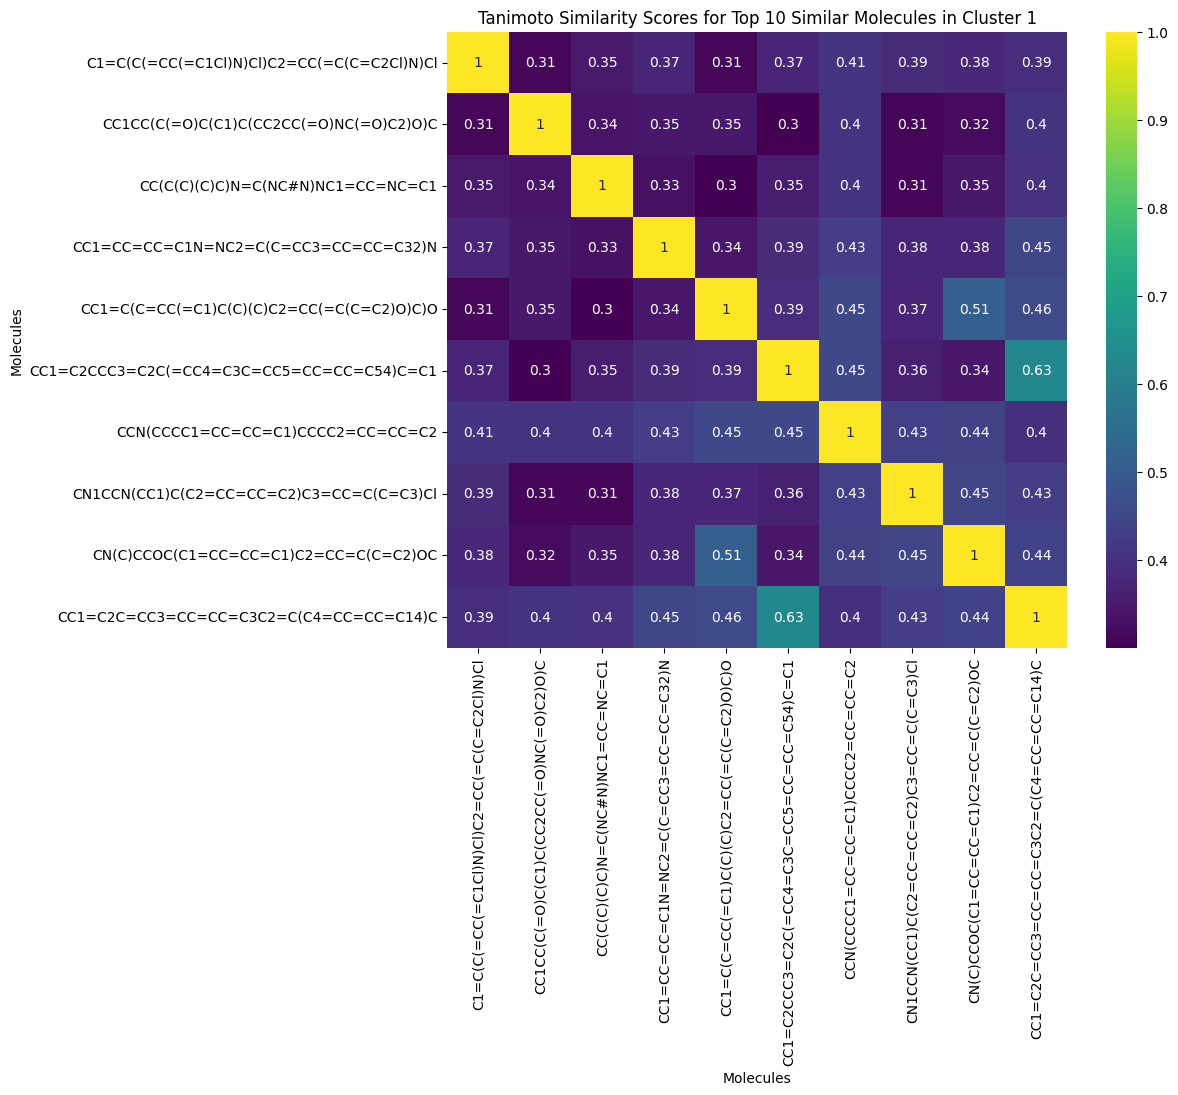

In [ ]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols

# Extract cluster 1 data
cluster_1_indices = np.where(labels == 10)[0]
cluster_1_smiles = [smiles_data[idx] for idx in cluster_1_indices]

# Filter out invalid SMILES strings
valid_smiles = []
for smi in cluster_1_smiles:
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        valid_smiles.append(smi)

# Function to compute Tanimoto similarity
def compute_tanimoto_similarity(smi1, smi2):
    mol1 = Chem.MolFromSmiles(smi1)
    mol2 = Chem.MolFromSmiles(smi2)
    fp1 = FingerprintMols.FingerprintMol(mol1)
    fp2 = FingerprintMols.FingerprintMol(mol2)
    return DataStructs.FingerprintSimilarity(fp1, fp2)

# Compute Tanimoto similarity scores for all pairs in Cluster 1
num_molecules = len(valid_smiles)
similarity_matrix = np.zeros((num_molecules, num_molecules))
for i in range(num_molecules):
    for j in range(num_molecules):
        if i != j:
            similarity_matrix[i, j] = compute_tanimoto_similarity(valid_smiles[i], valid_smiles[j])

# Calculate the average similarity score for each molecule
average_similarities = similarity_matrix.mean(axis=1)

# Select the indices of the 10 molecules with the highest average similarity scores
top_10_indices = np.argsort(average_similarities)[-10:]

# Get the SMILES strings of the top 10 molecules
selected_smiles = [valid_smiles[idx] for idx in top_10_indices]

# Compute Tanimoto similarity scores between each pair of the selected 10 molecules
selected_similarity_matrix = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        selected_similarity_matrix[i, j] = compute_tanimoto_similarity(selected_smiles[i], selected_smiles[j])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(selected_similarity_matrix, annot=True, cmap='viridis', xticklabels=selected_smiles, yticklabels=selected_smiles)
plt.title('Tanimoto Similarity Scores for Top 10 Similar Molecules in Cluster 1')
plt.xlabel('Molecules')
plt.ylabel('Molecules')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import numpy as np

def compute_tanimoto_similarity(smi1, smi2):
    mol1 = Chem.MolFromSmiles(smi1)
    mol2 = Chem.MolFromSmiles(smi2)
    if mol1 is None or mol2 is None:
        return None
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2, nBits=2048)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 2, nBits=2048)
    return DataStructs.TanimotoSimilarity(fp1, fp2)

unique_labels = np.unique(labels)
cluster_similarities = {}

for label in unique_labels:
    cluster_indices = np.where(labels == label)[0]
    cluster_smiles = [smiles_data[idx] for idx in cluster_indices]
    sims = []
    for i in range(len(cluster_smiles)):
        for j in range(i + 1, len(cluster_smiles)):
            similarity = compute_tanimoto_similarity(cluster_smiles[i], cluster_smiles[j])
            if similarity is not None:
                sims.append(similarity)
    cluster_similarities[label] = sims


[17:28:23] Explicit valence for atom # 1 Br, 5, is greater than permitted
[17:28:23] Explicit valence for atom # 1 Br, 5, is greater than permitted
[17:28:23] Explicit valence for atom # 1 Br, 5, is greater than permitted
[17:28:23] Explicit valence for atom # 1 Br, 5, is greater than permitted
[17:28:23] Explicit valence for atom # 1 Br, 5, is greater than permitted
[17:28:23] Explicit valence for atom # 1 Br, 5, is greater than permitted
[17:28:23] Explicit valence for atom # 1 Br, 5, is greater than permitted
[17:28:23] Explicit valence for atom # 1 Br, 5, is greater than permitted
[17:28:23] Explicit valence for atom # 1 Br, 5, is greater than permitted
[17:28:23] Explicit valence for atom # 1 Br, 5, is greater than permitted
[17:28:23] Explicit valence for atom # 1 Br, 5, is greater than permitted
[17:28:23] Explicit valence for atom # 1 Br, 5, is greater than permitted
[17:28:23] Explicit valence for atom # 1 Br, 5, is greater than permitted
[17:28:23] Explicit valence for atom #

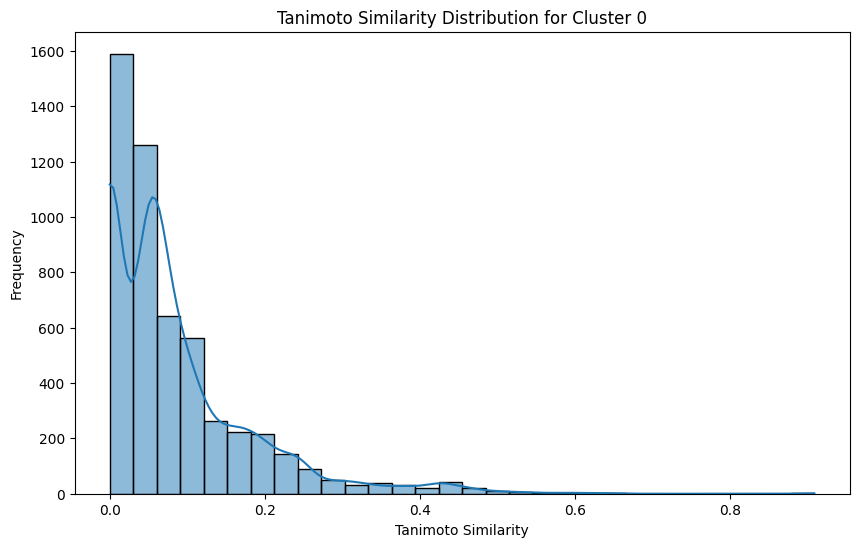

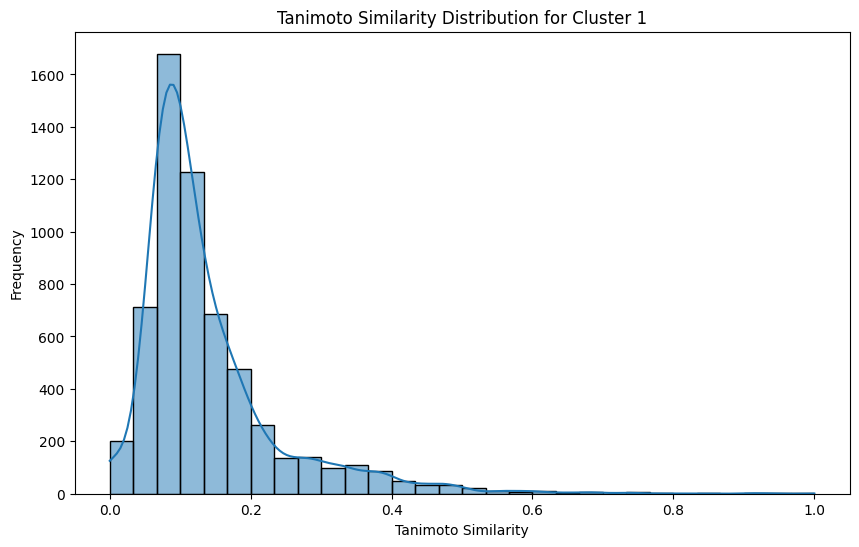

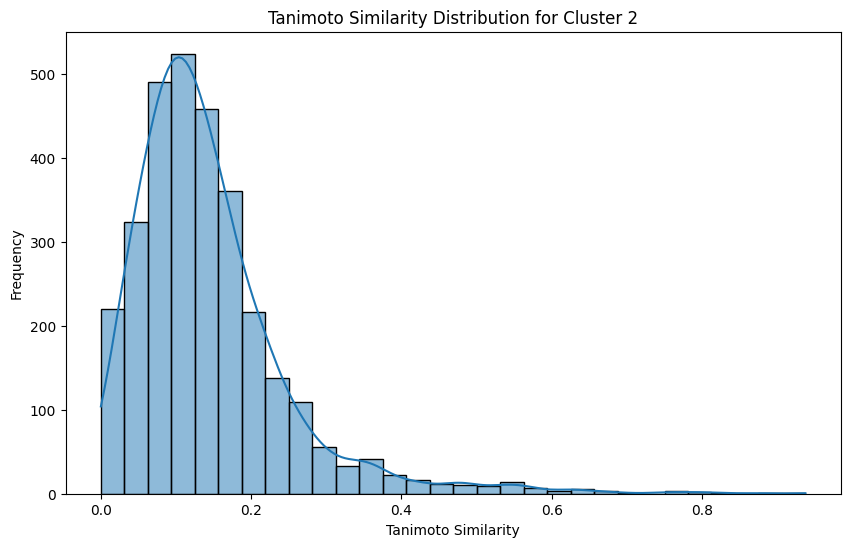

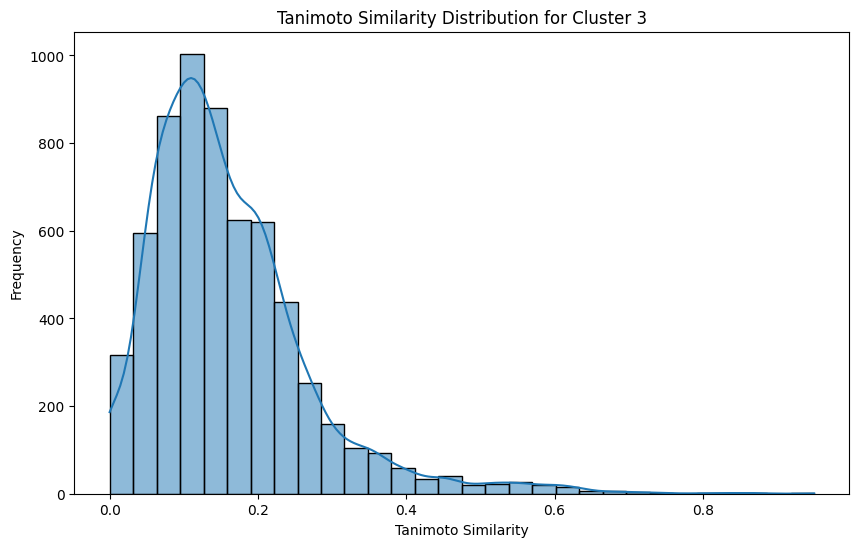

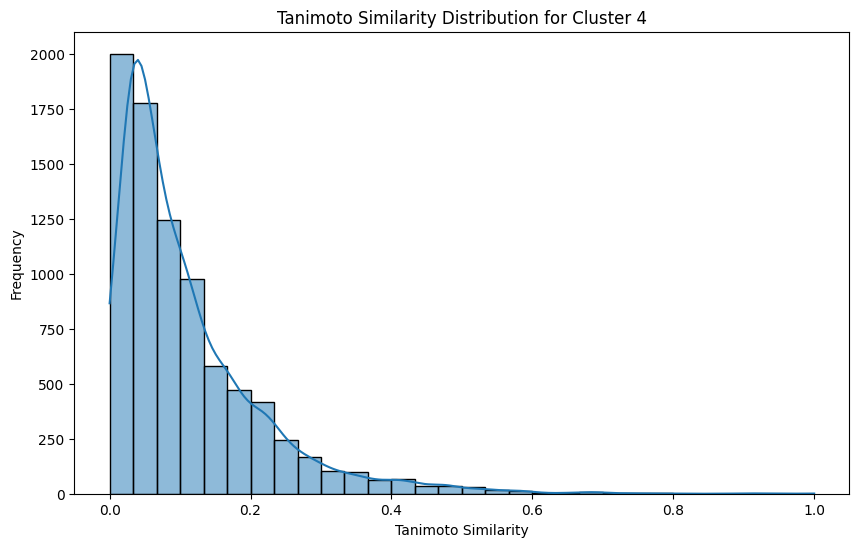

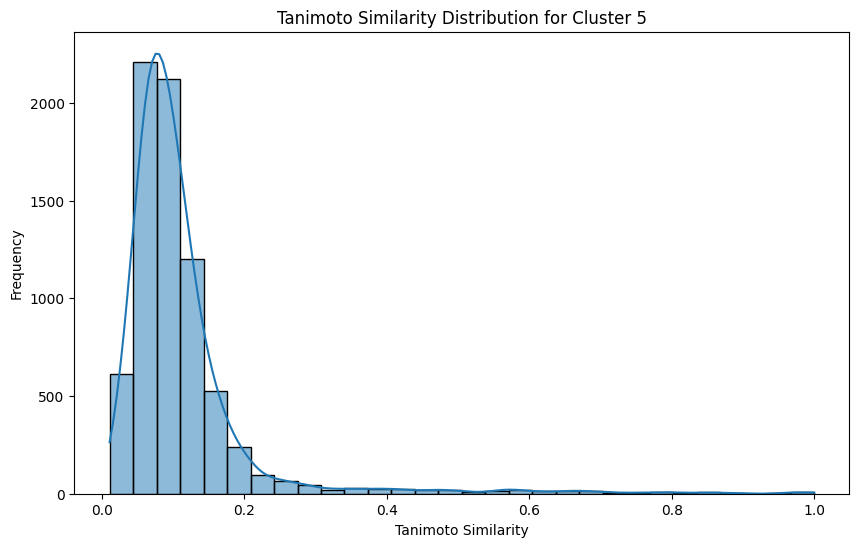

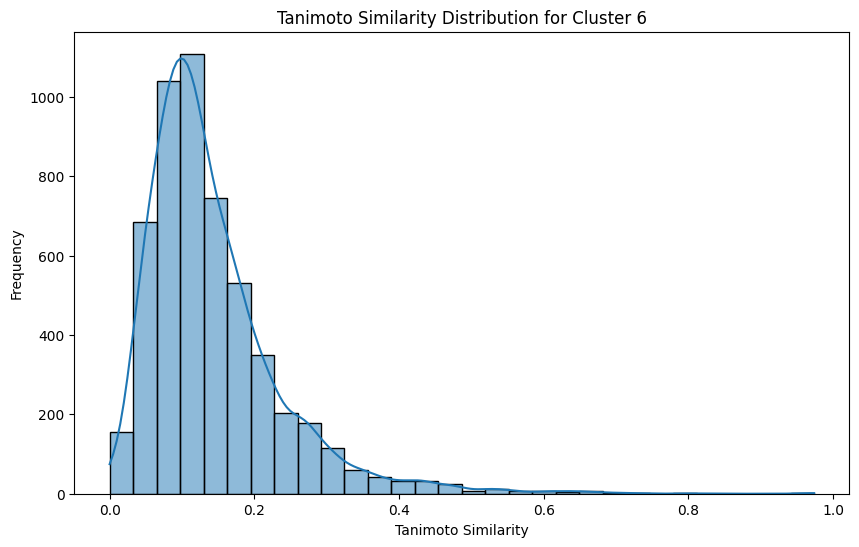

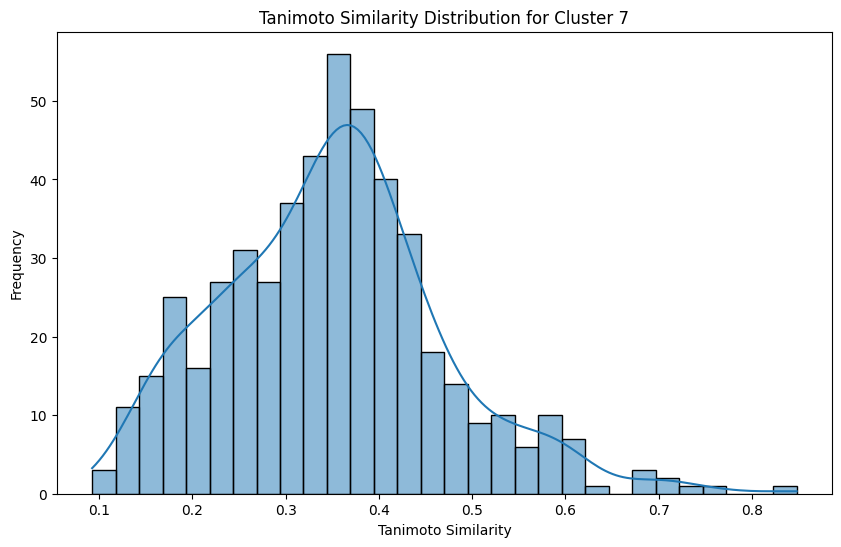

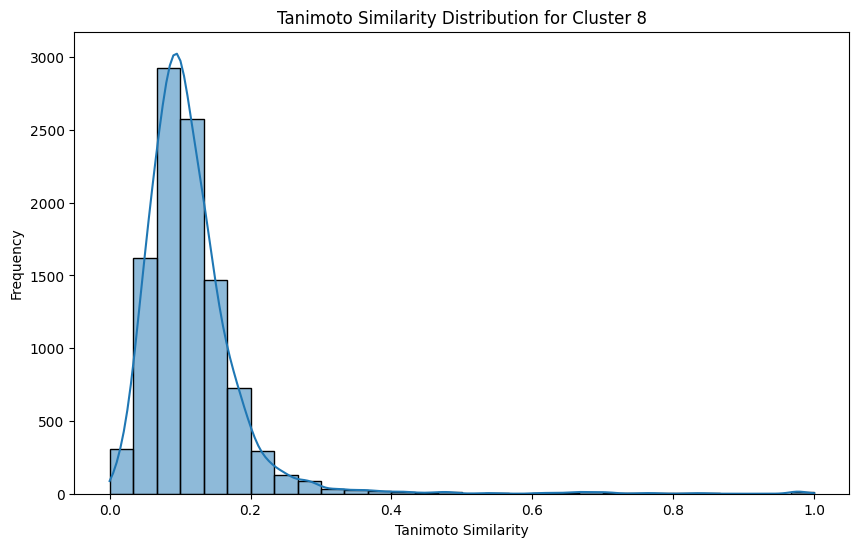

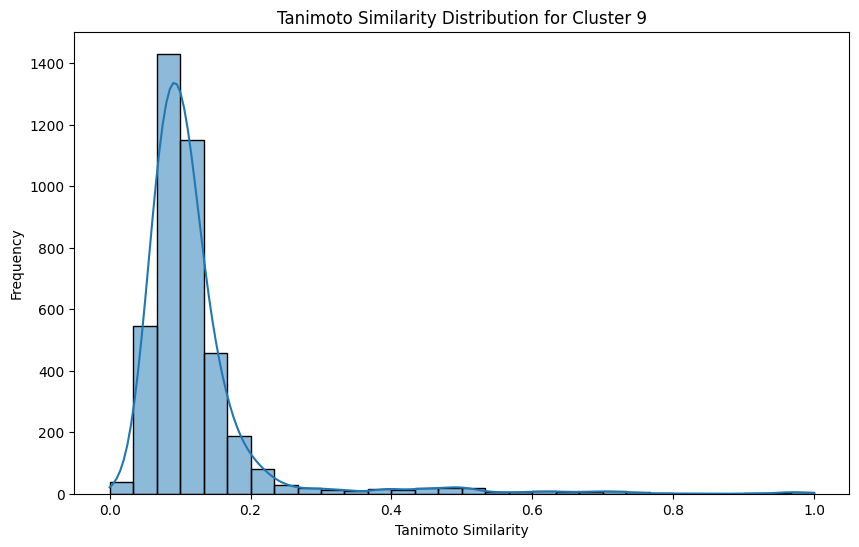

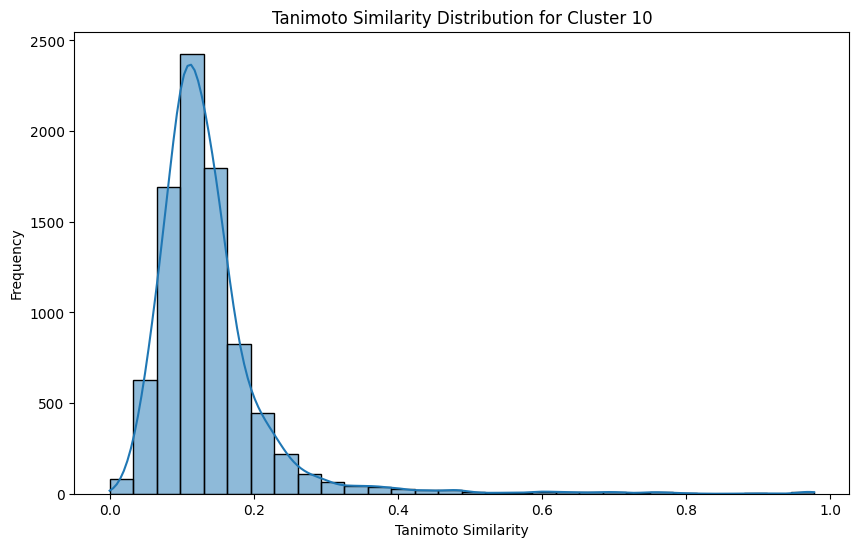

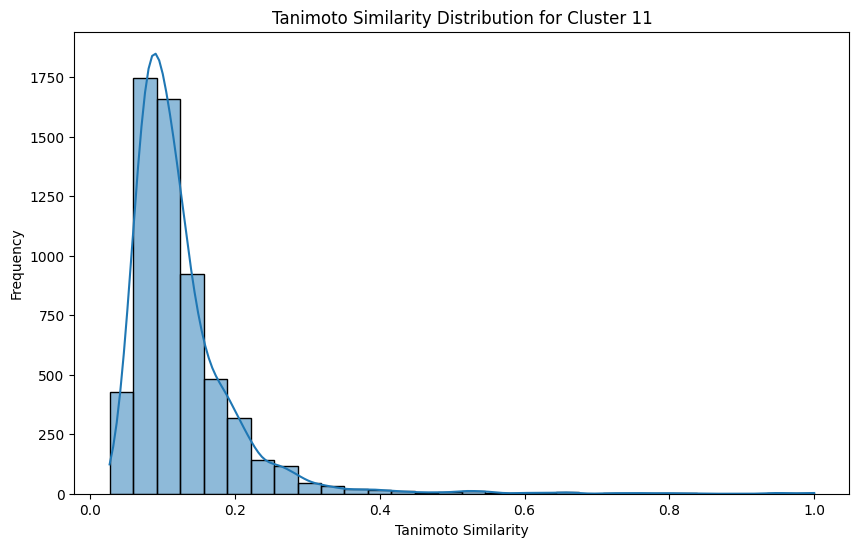

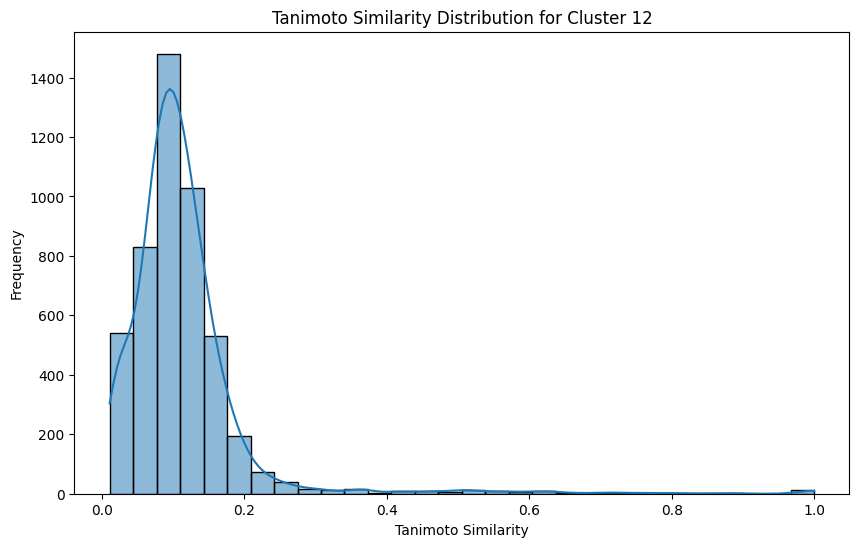

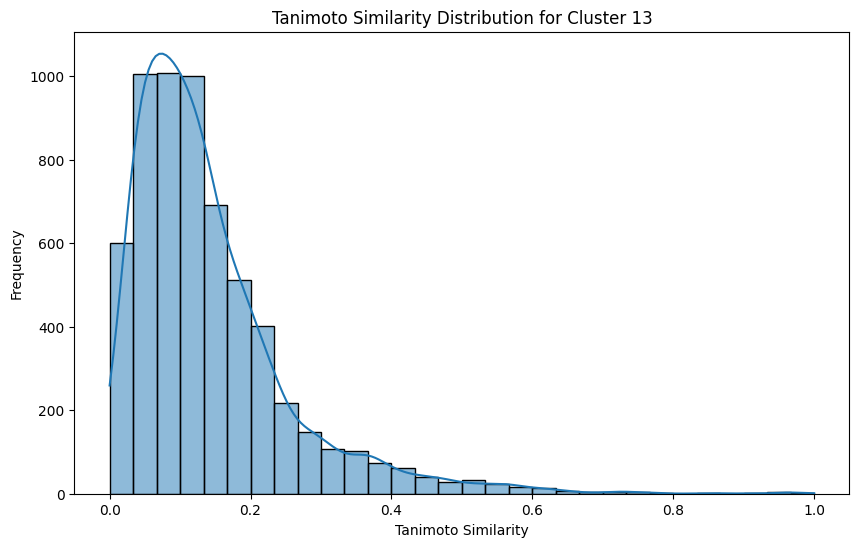

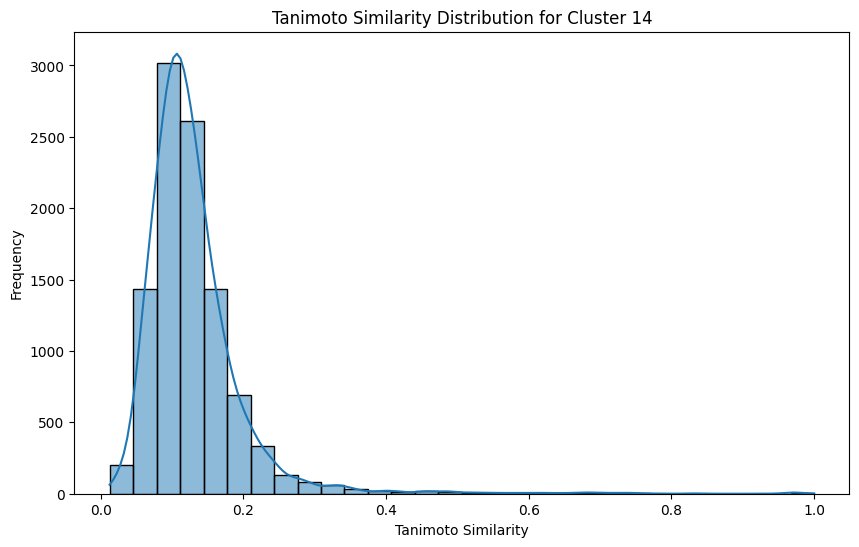

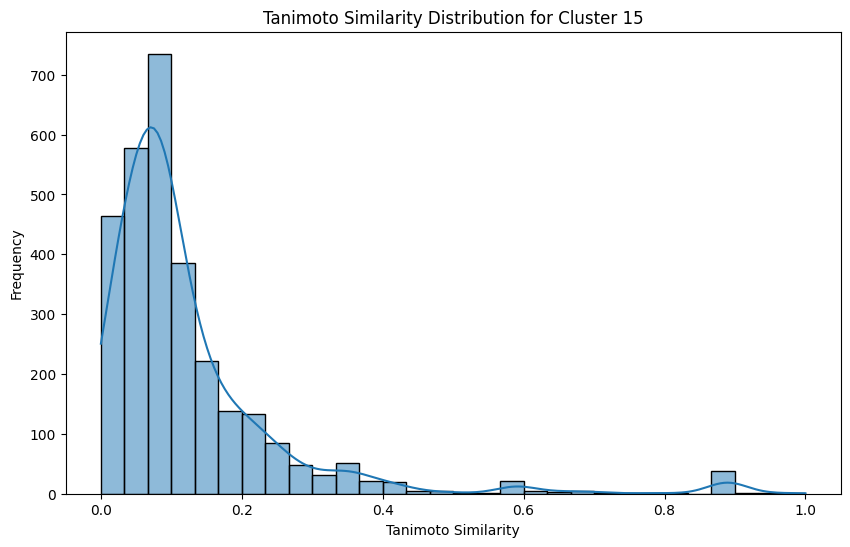

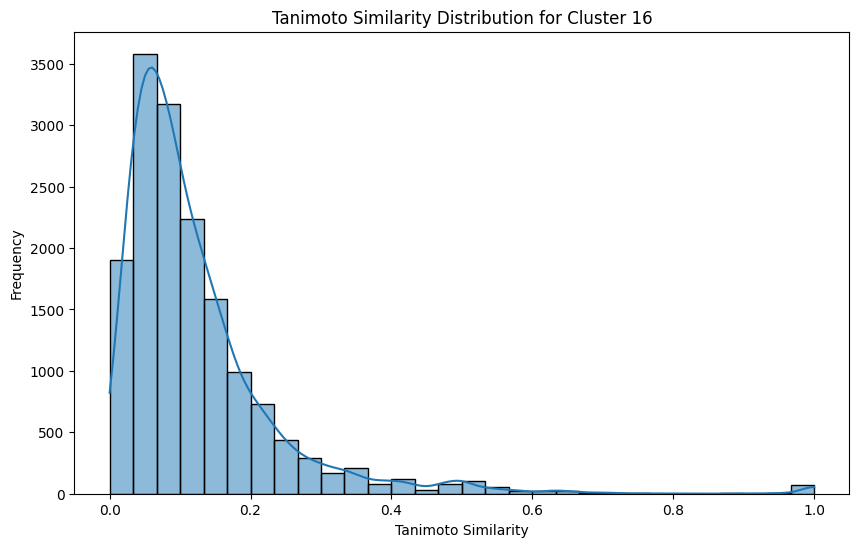

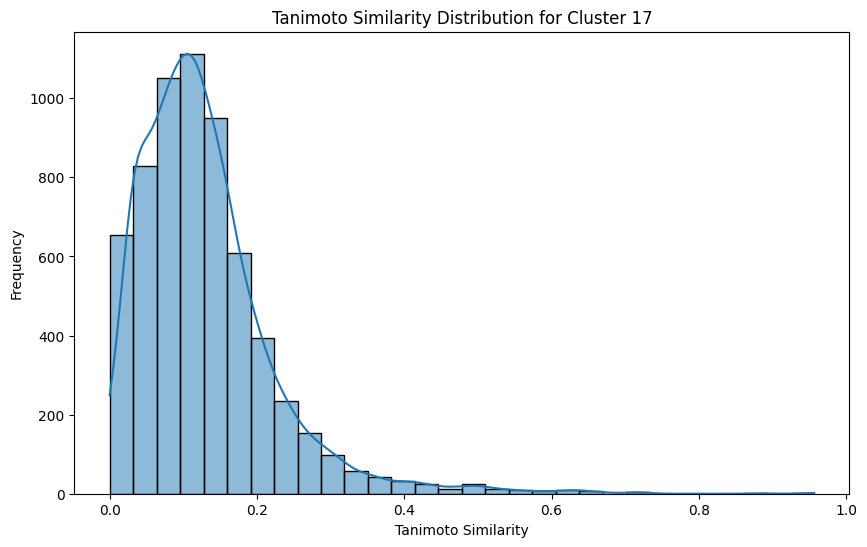

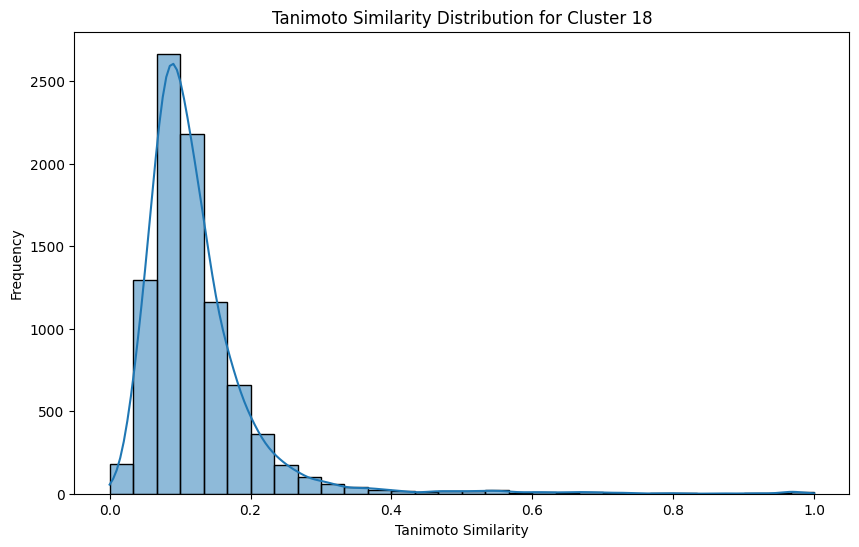

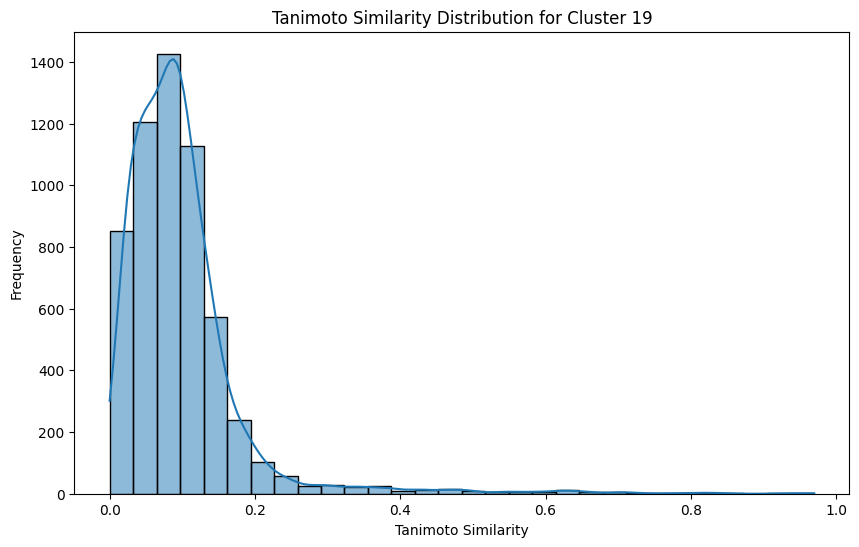

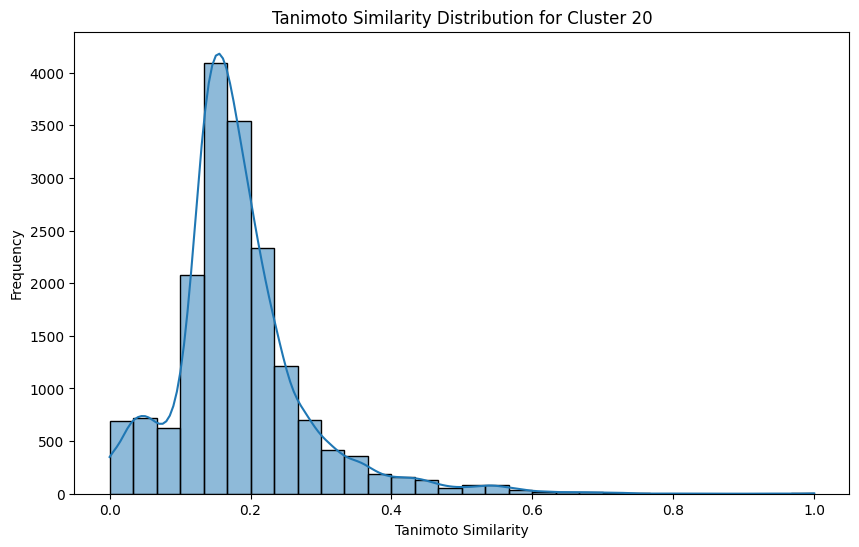

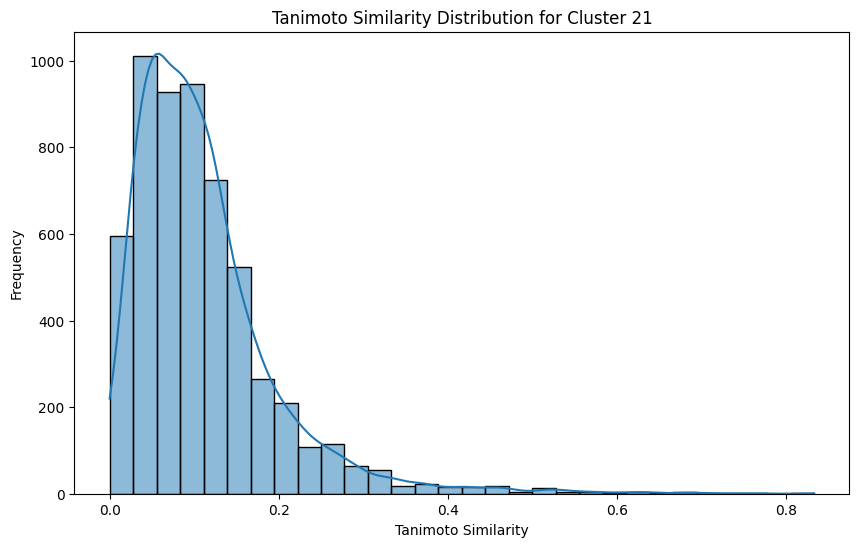

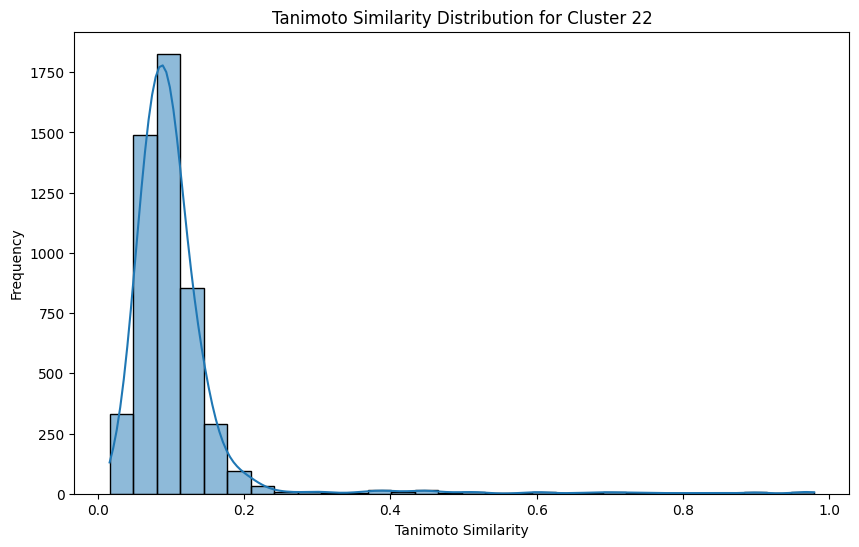

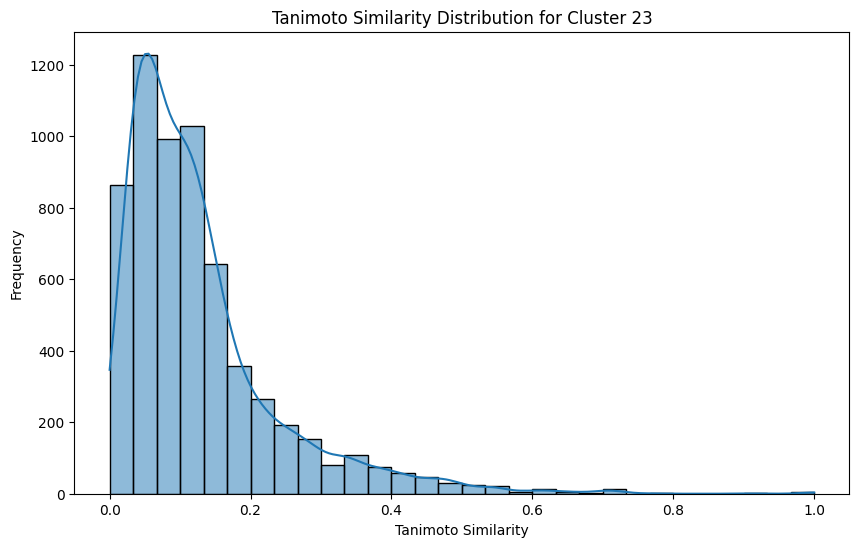

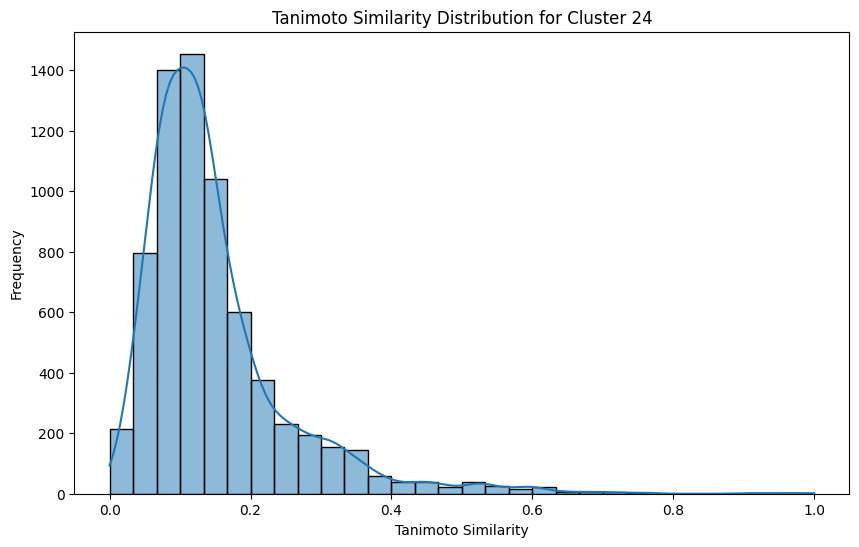

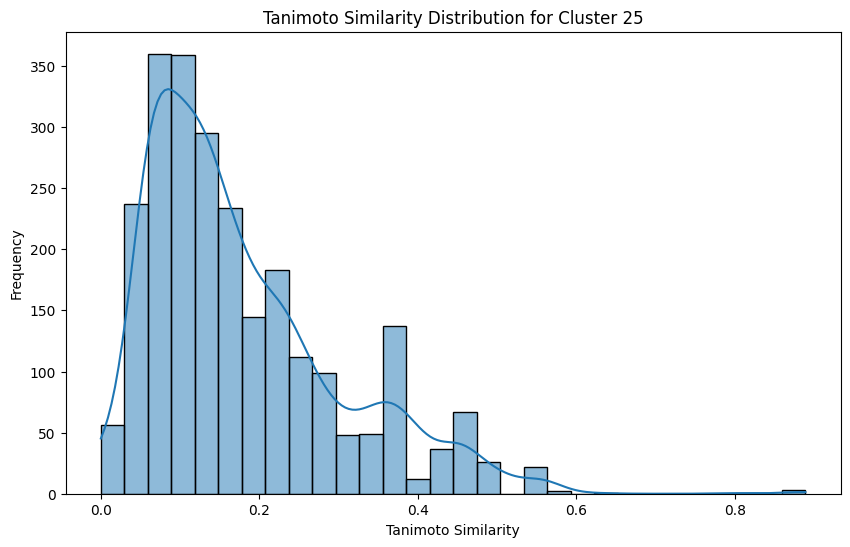

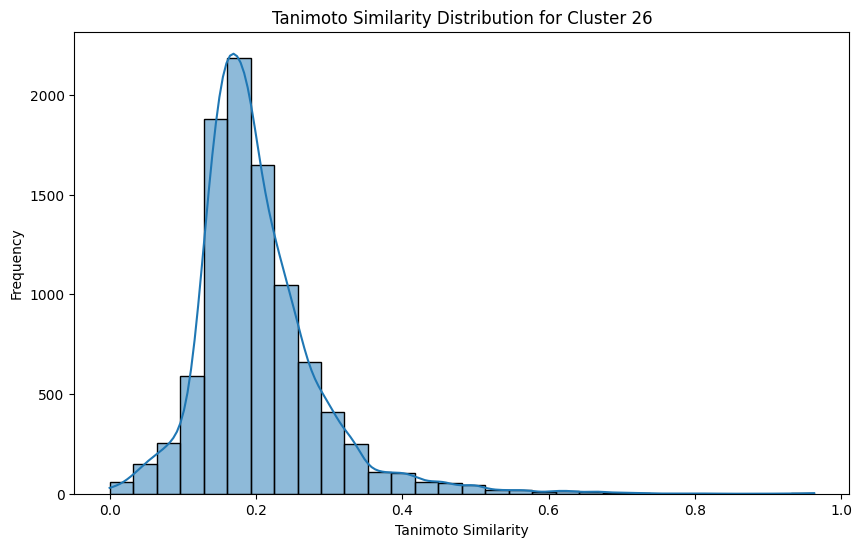

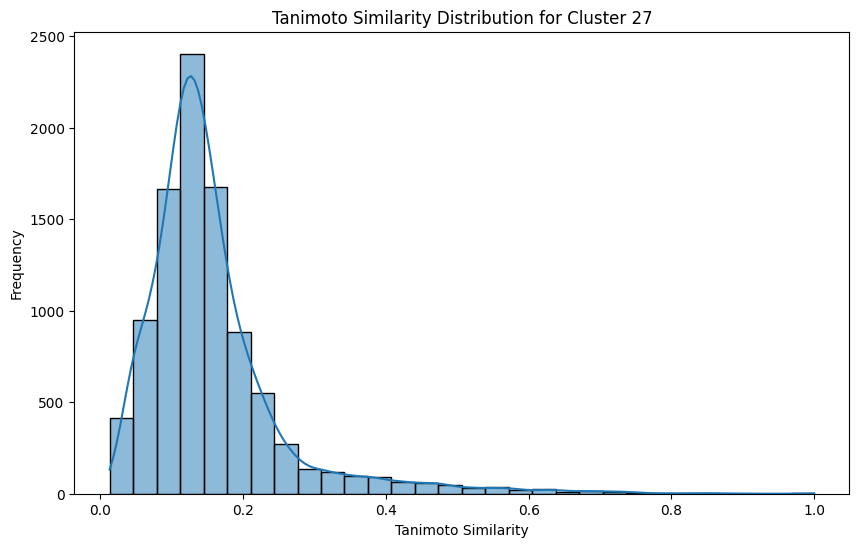

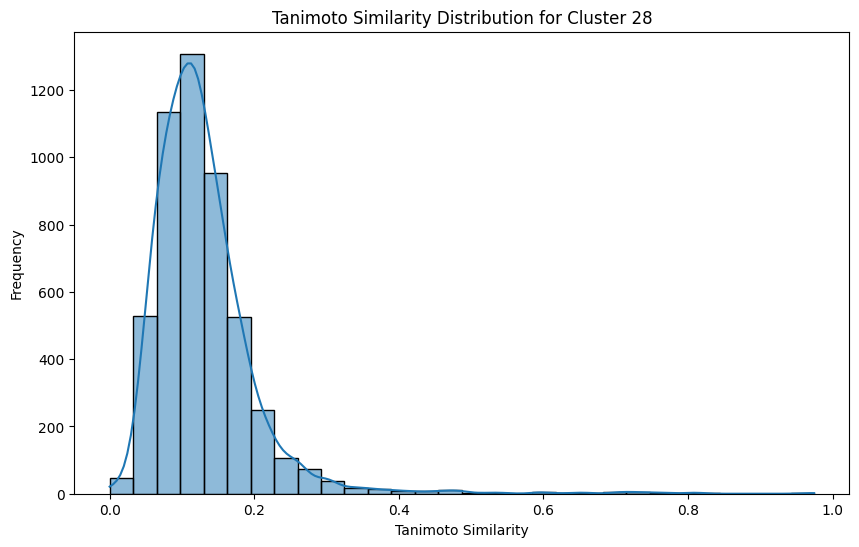

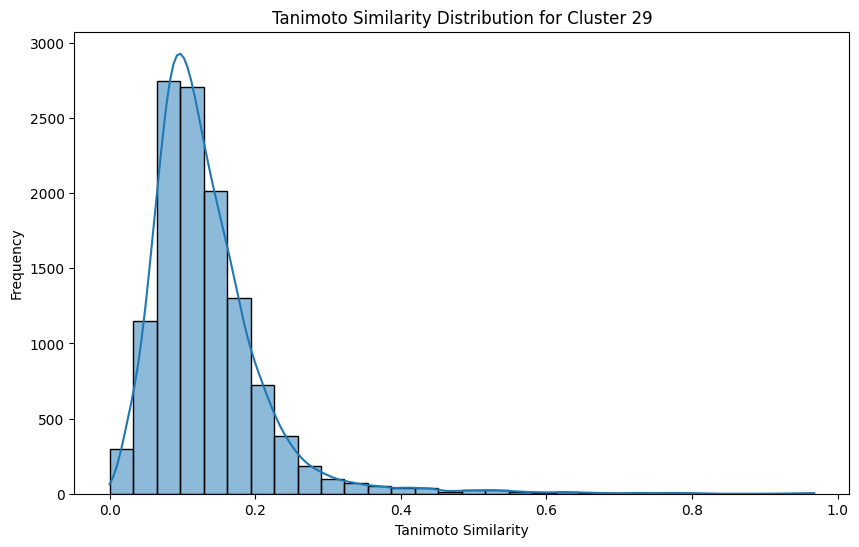

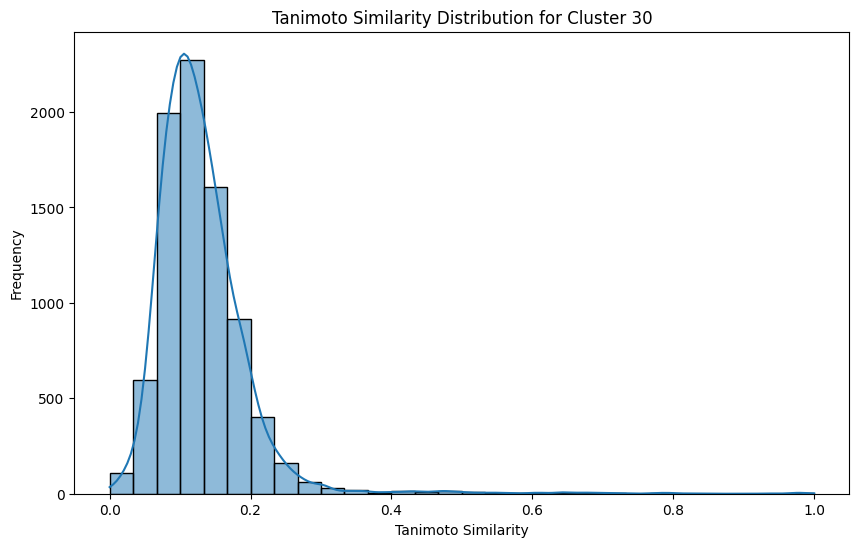

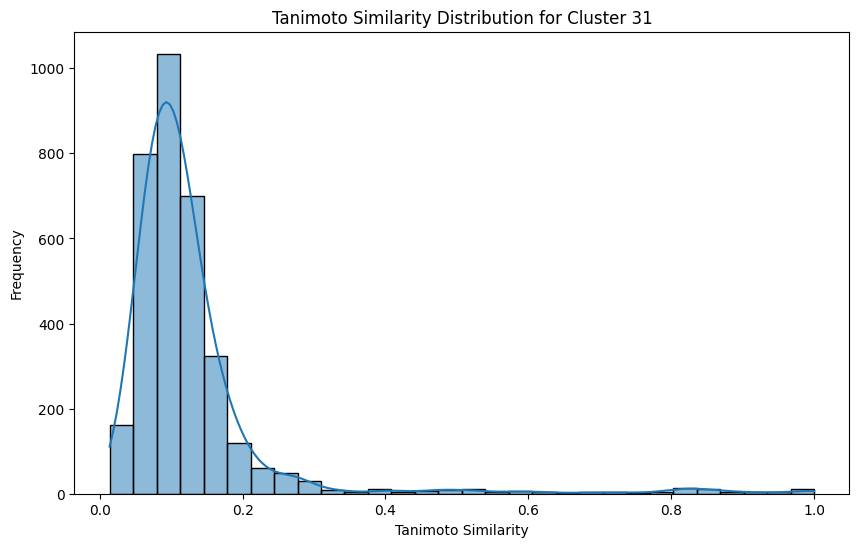

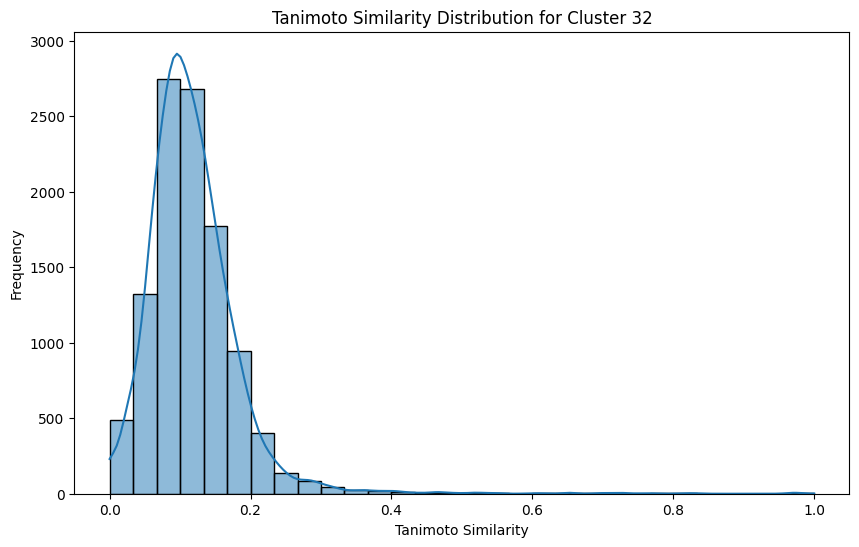

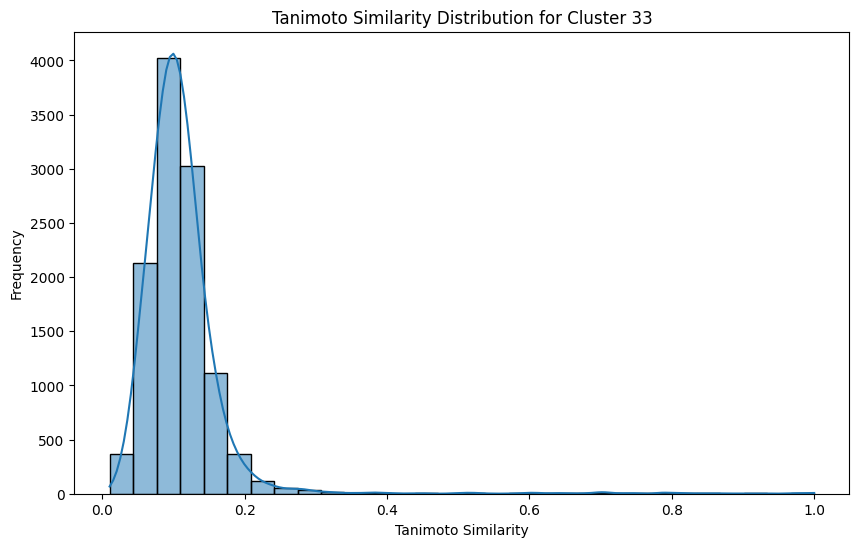

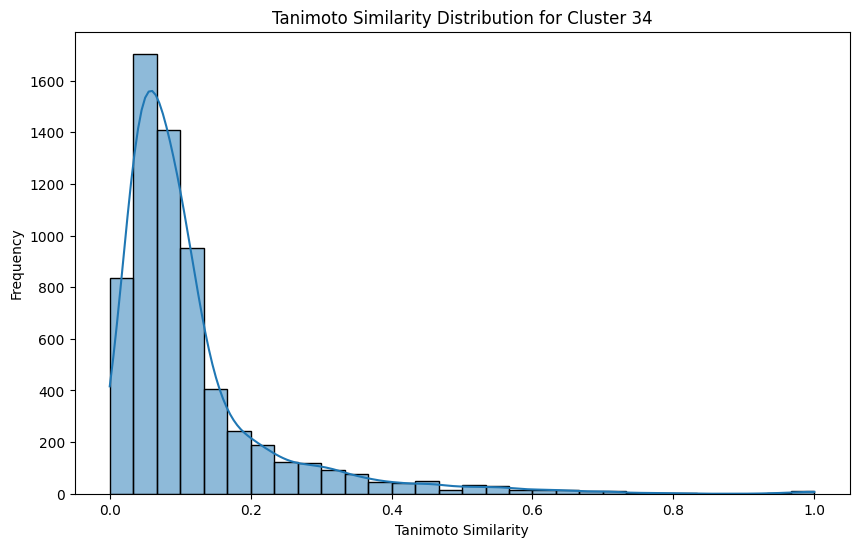

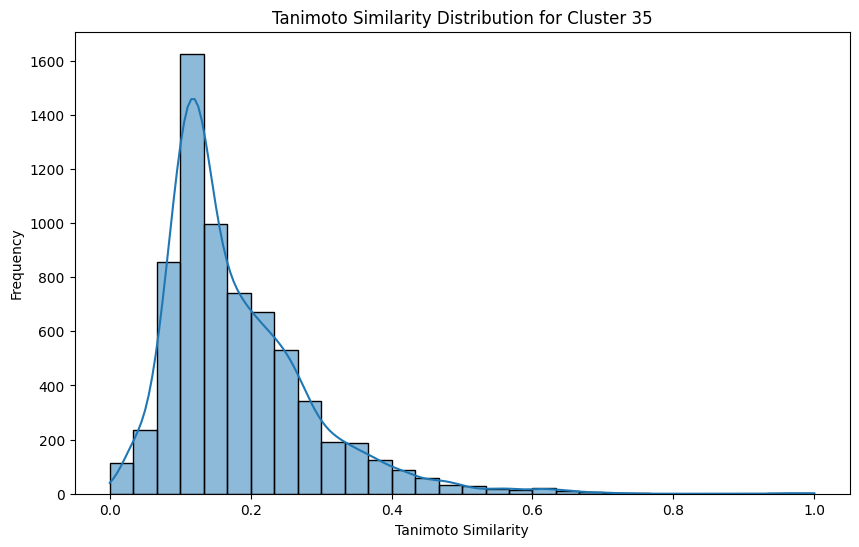

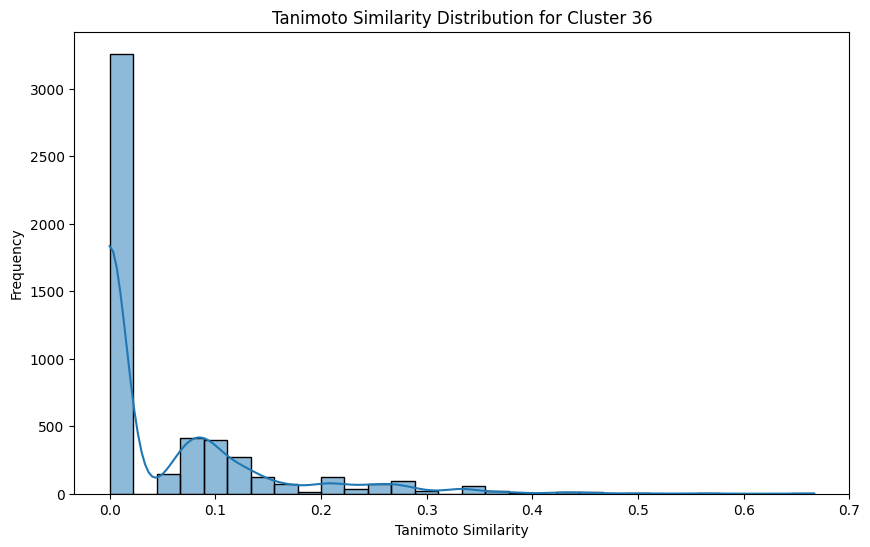

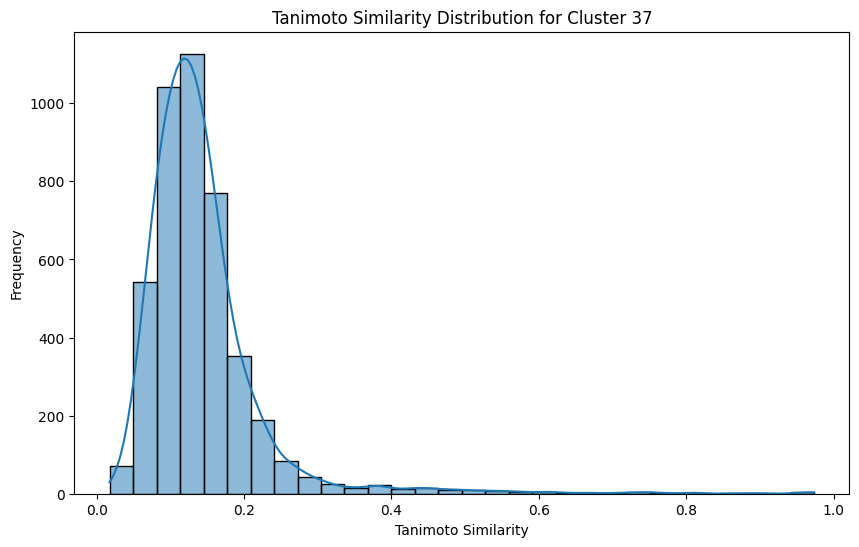

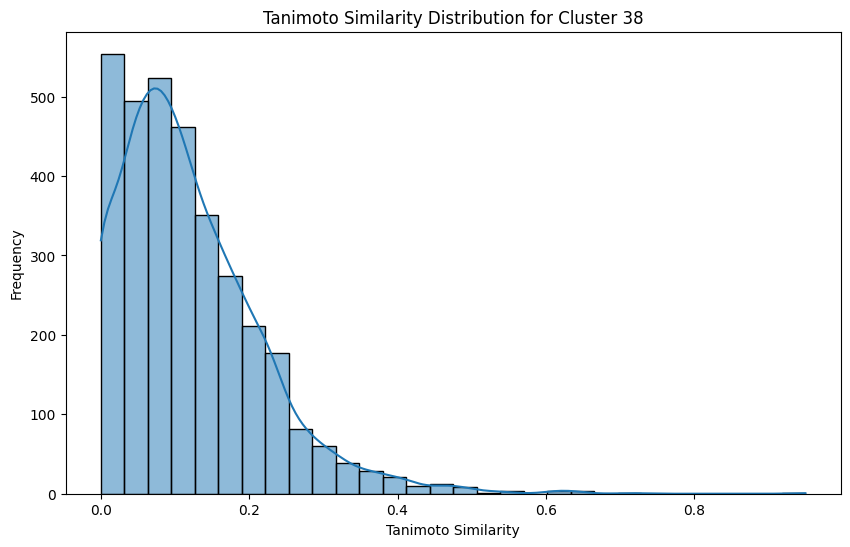

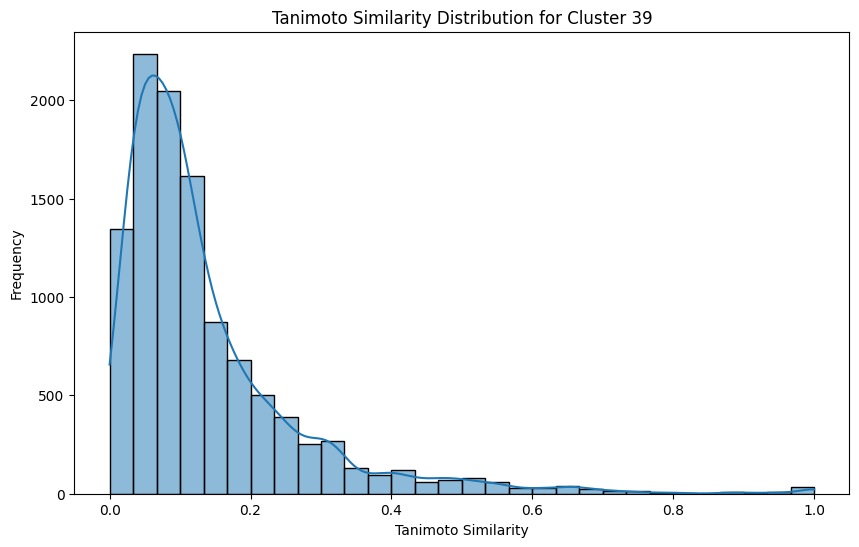

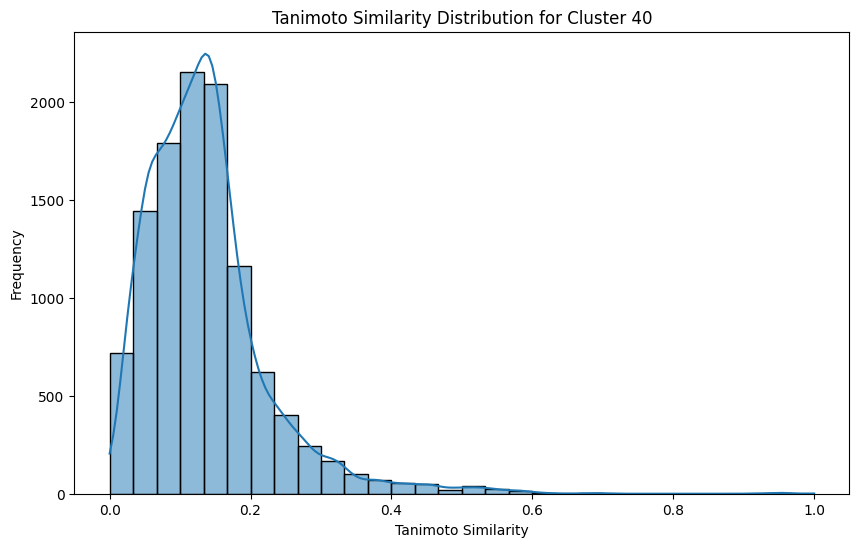

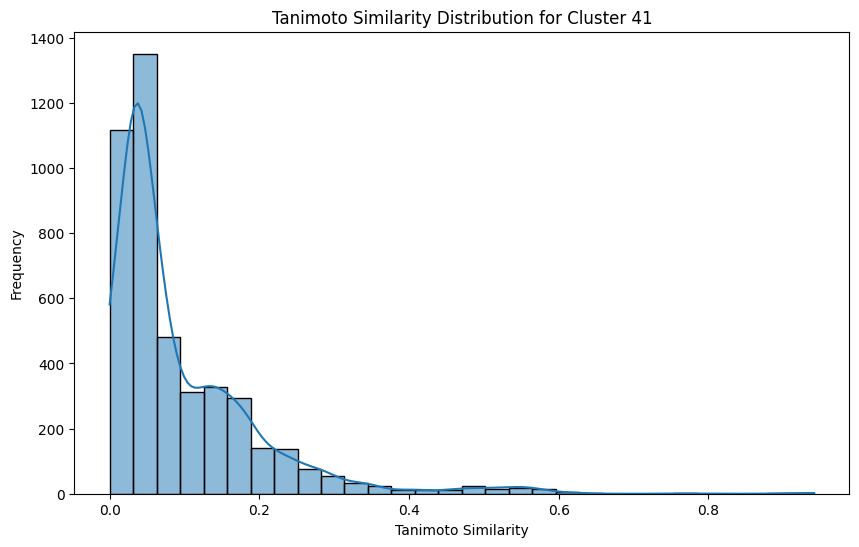

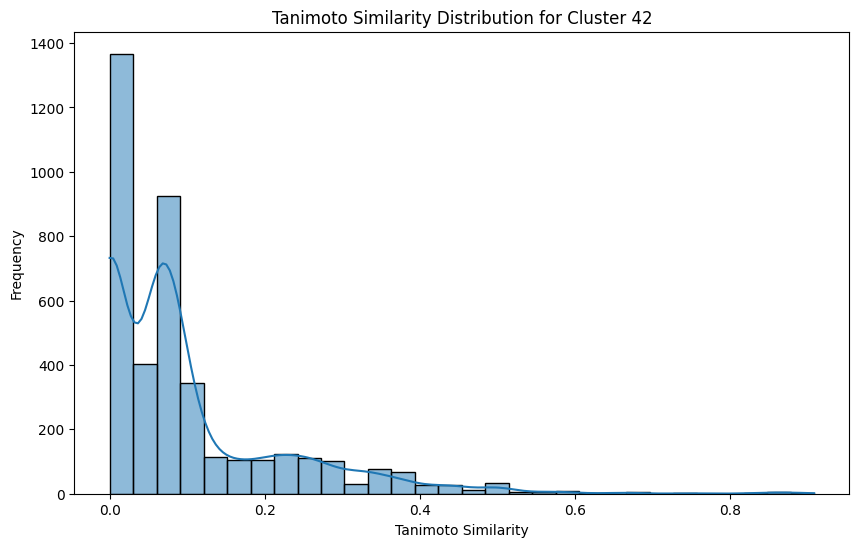

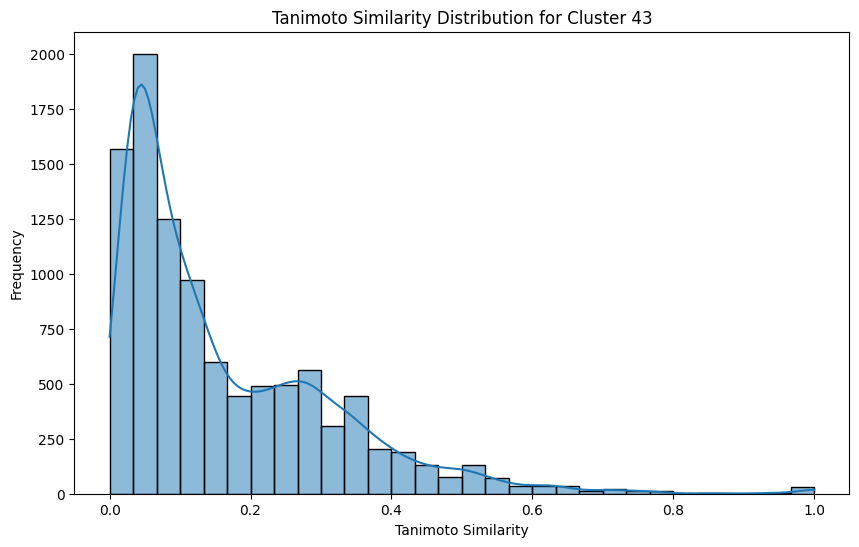

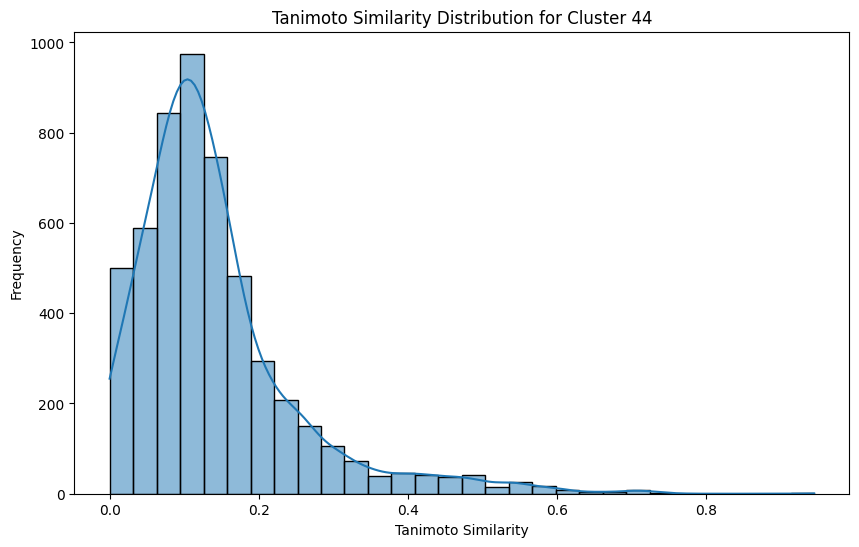

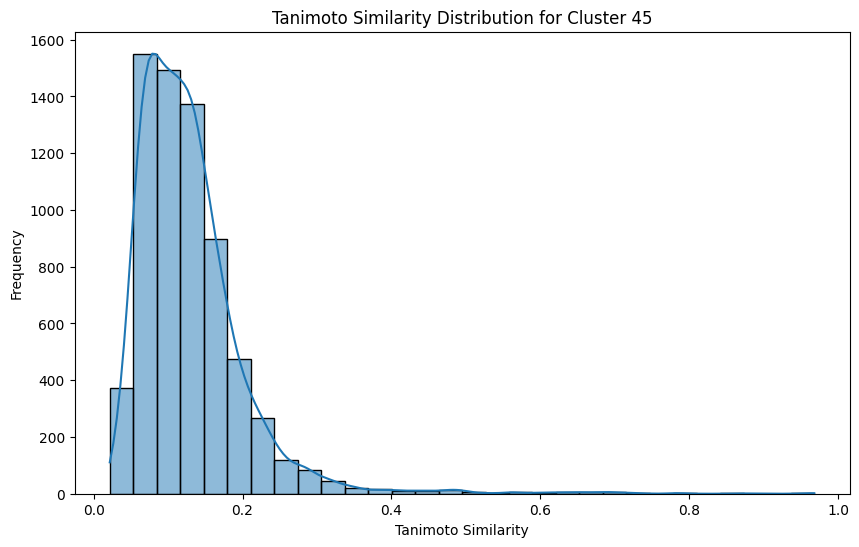

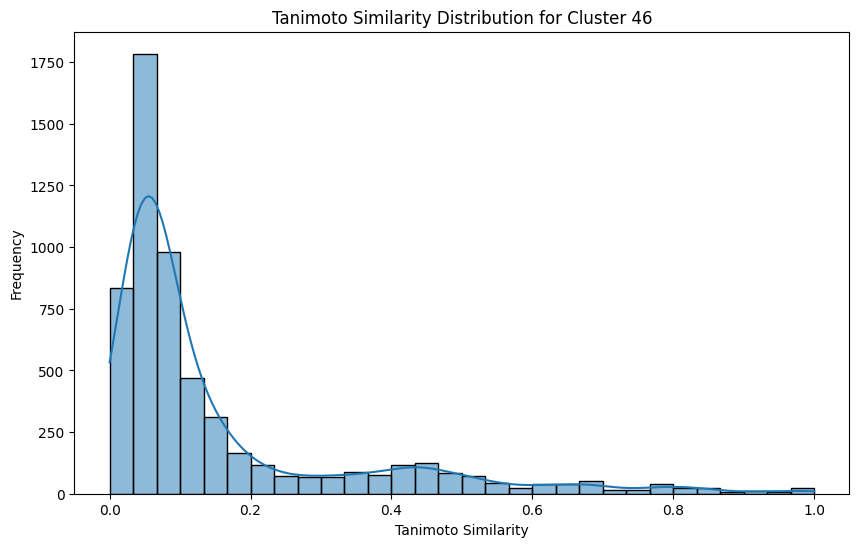

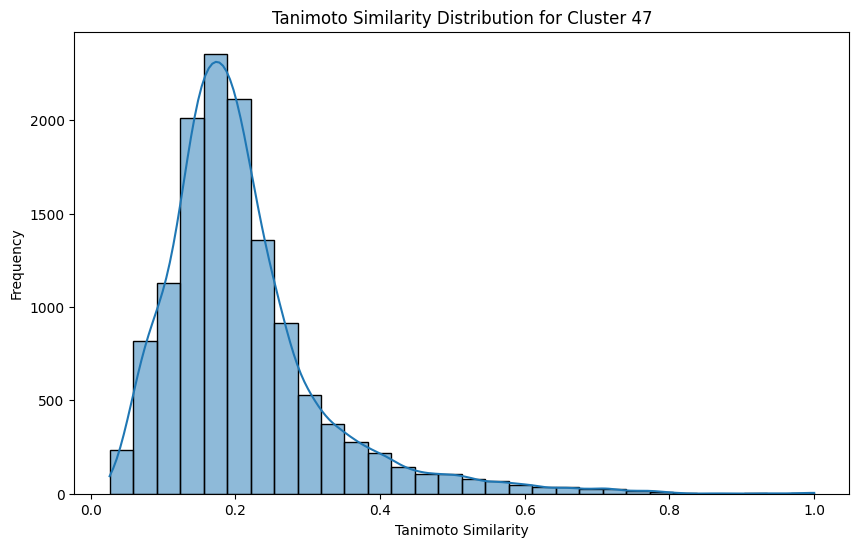

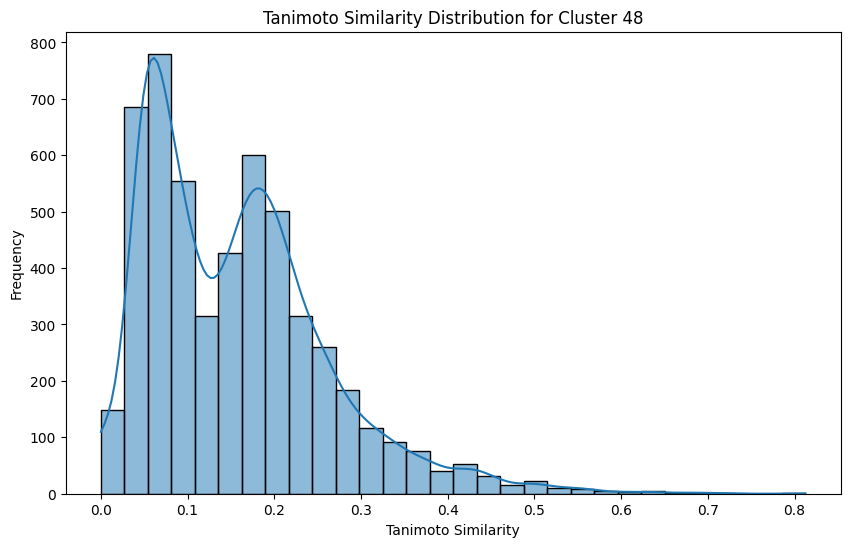

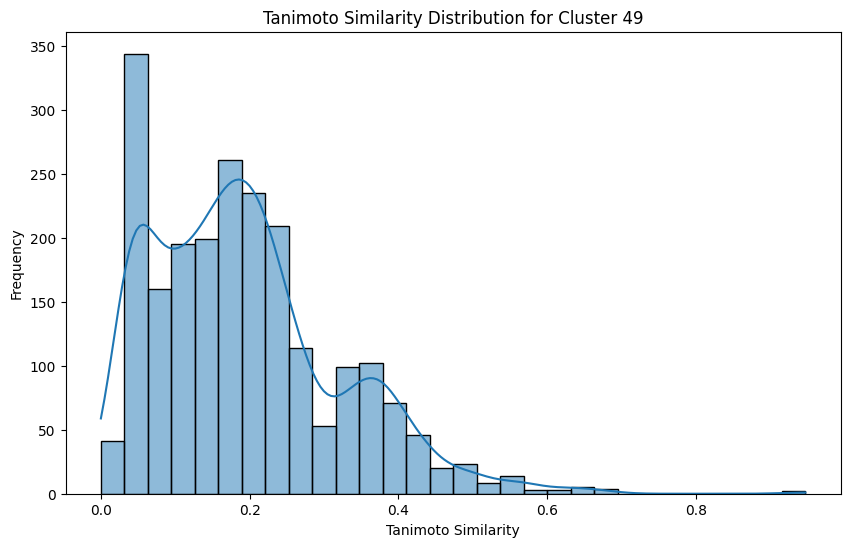

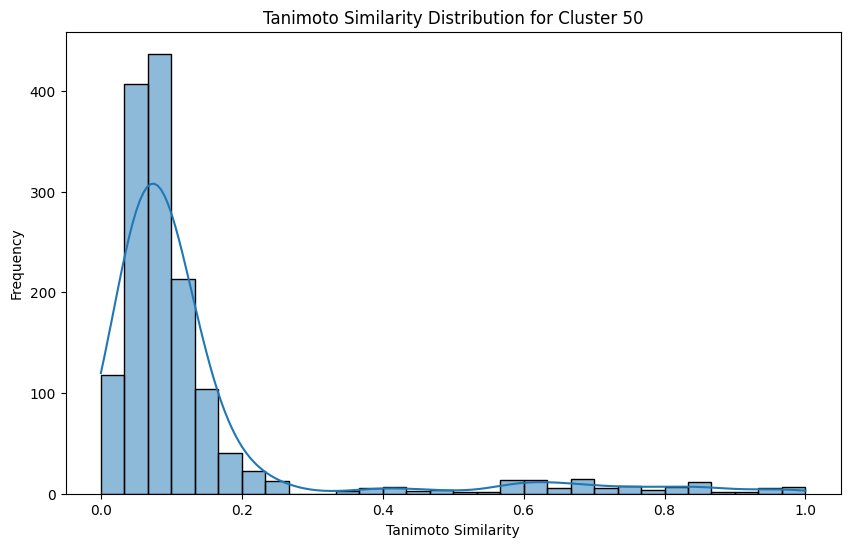

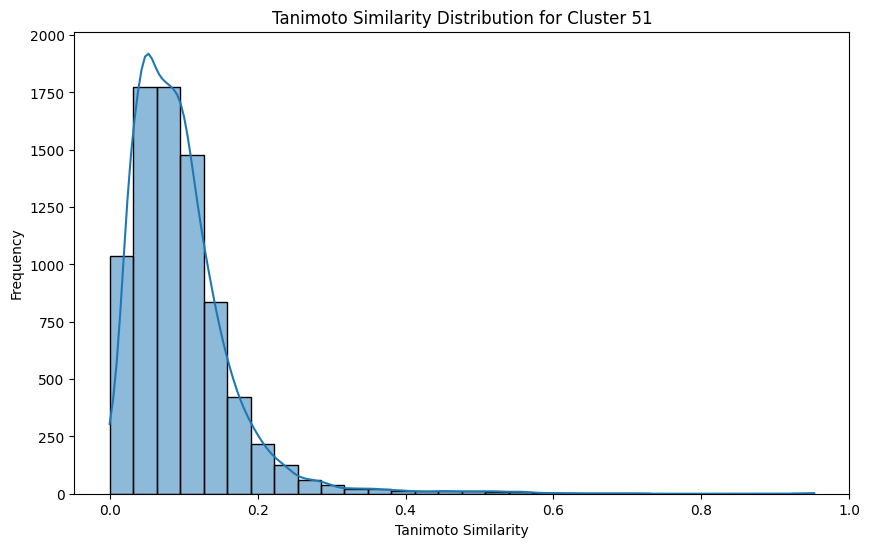

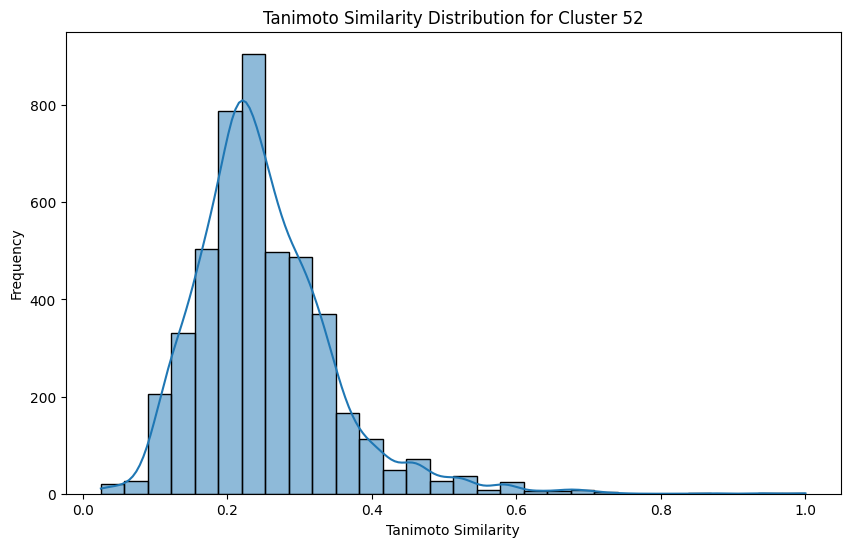

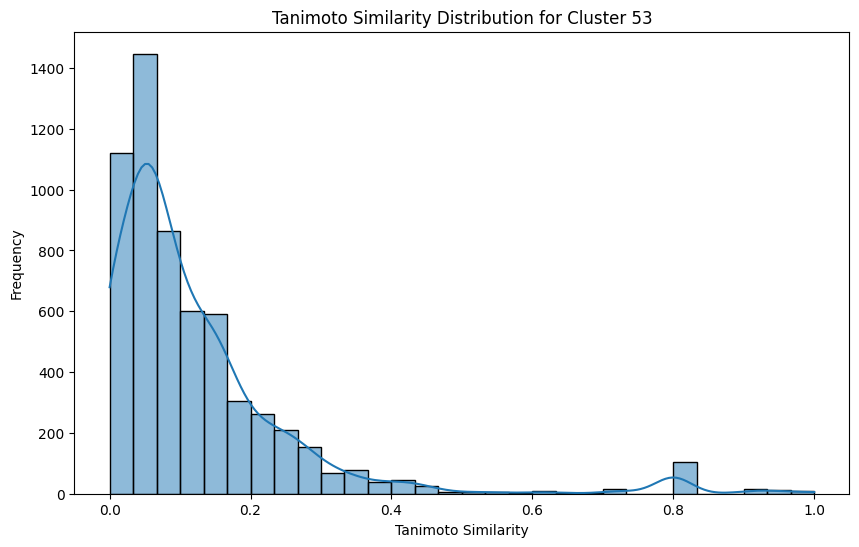

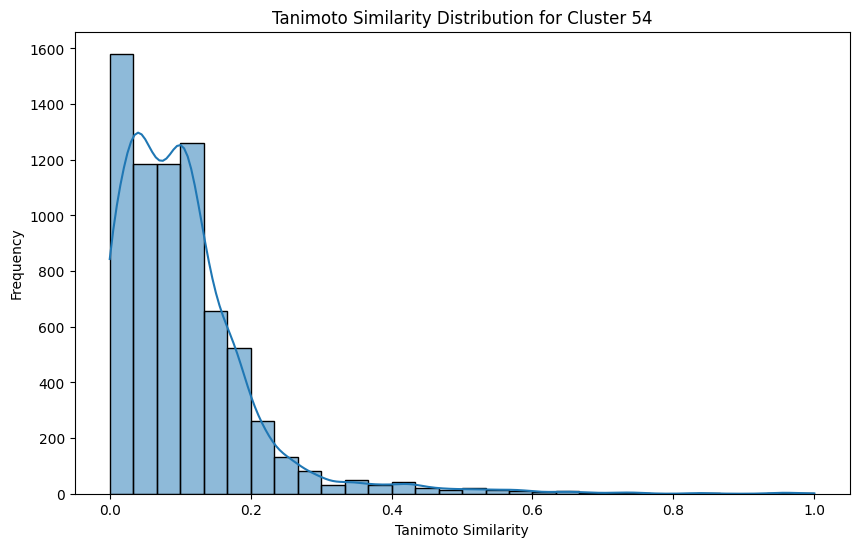

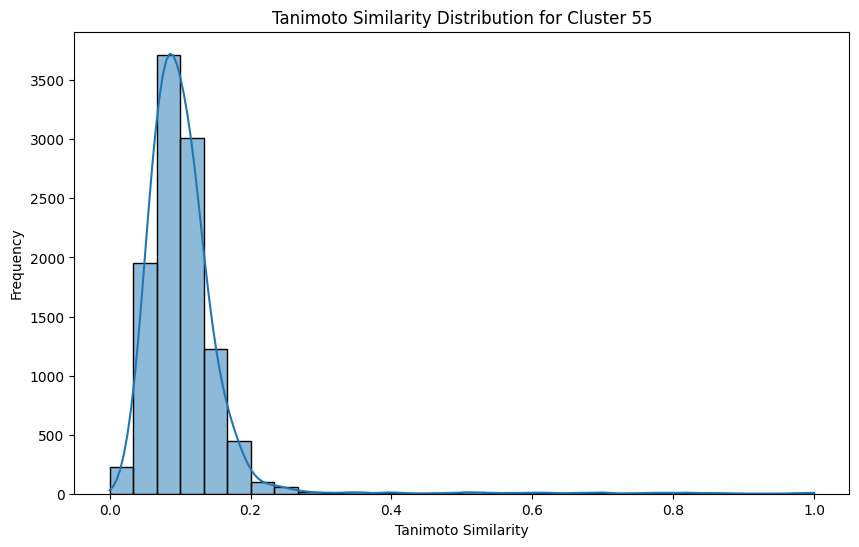

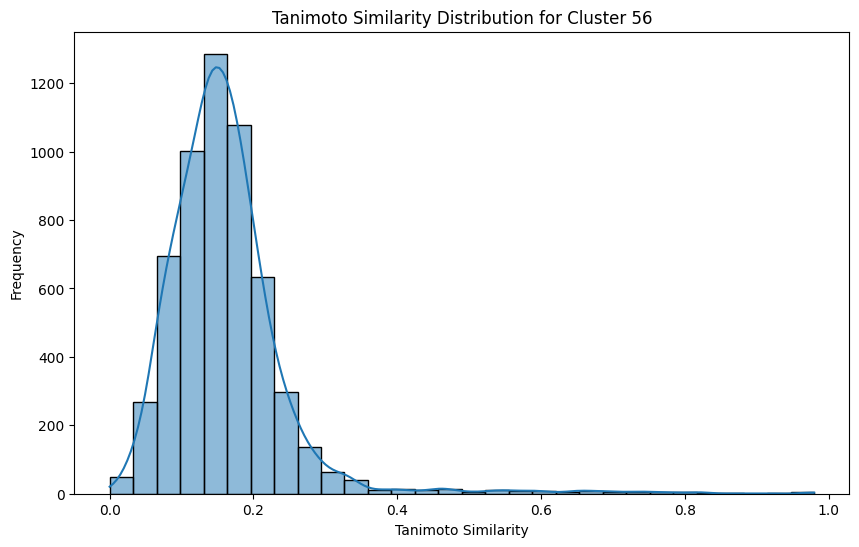

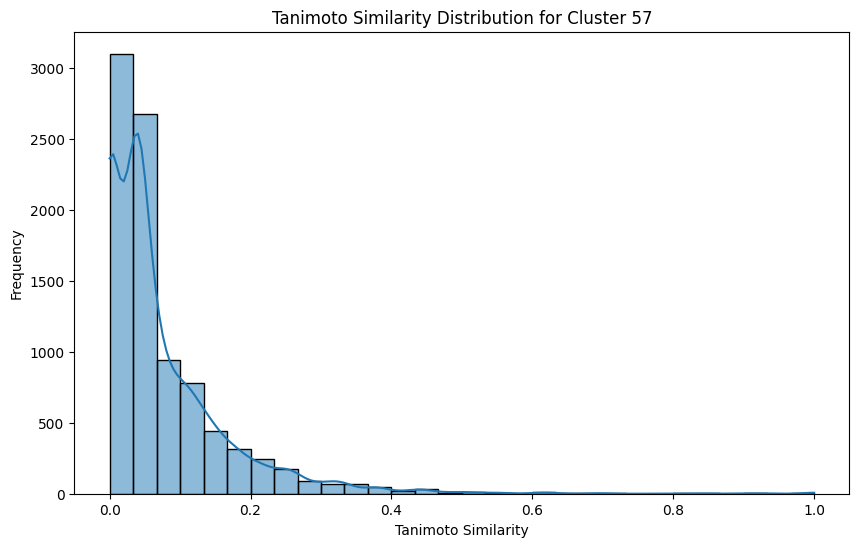

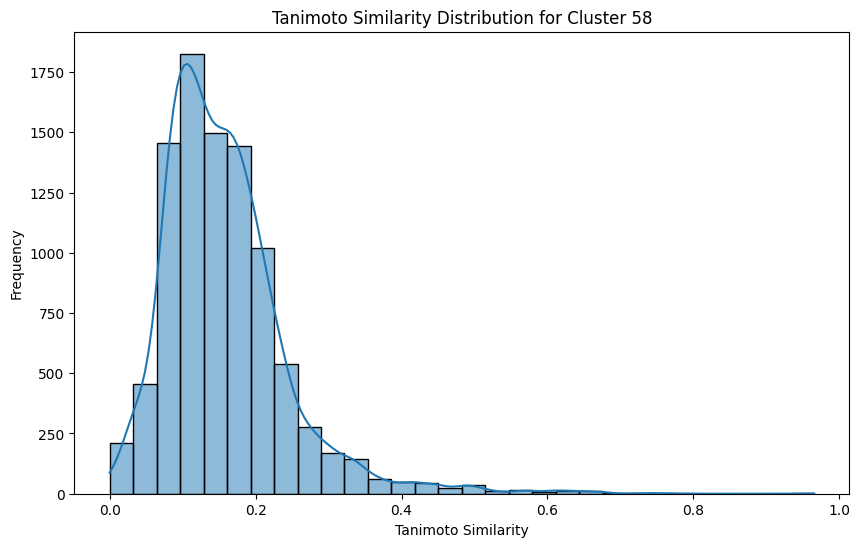

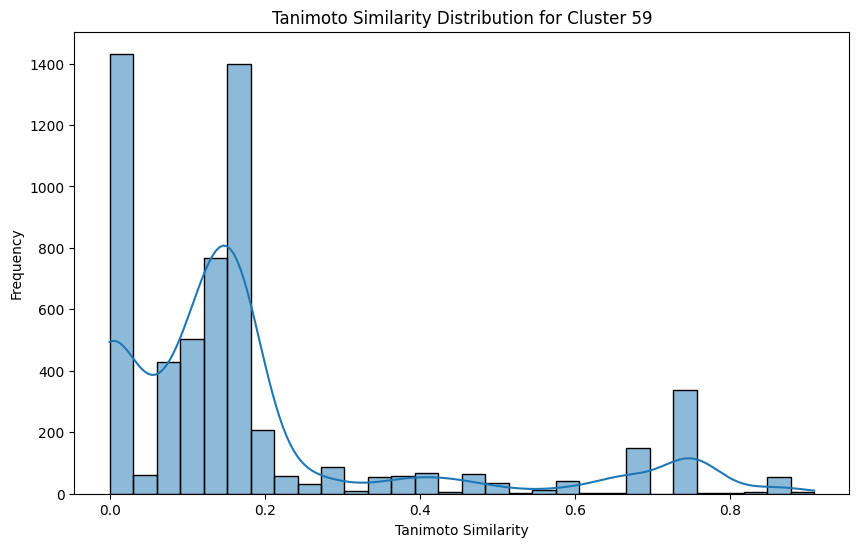

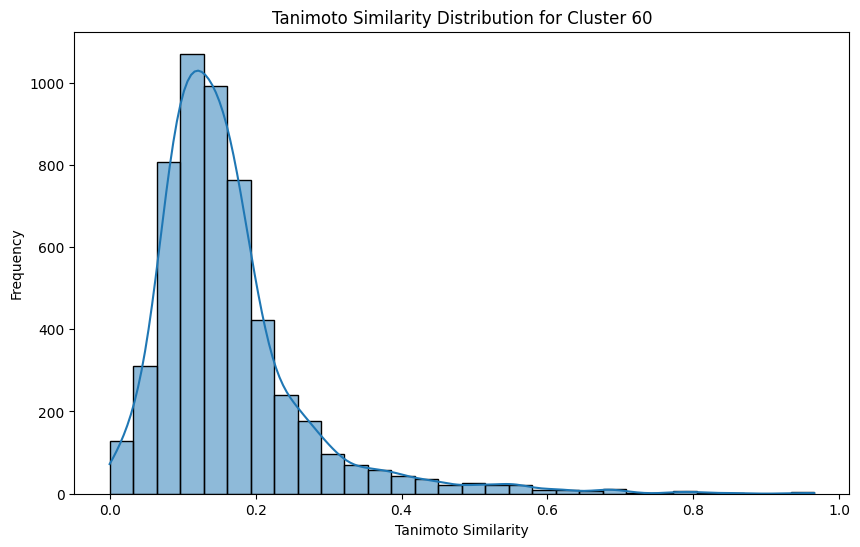

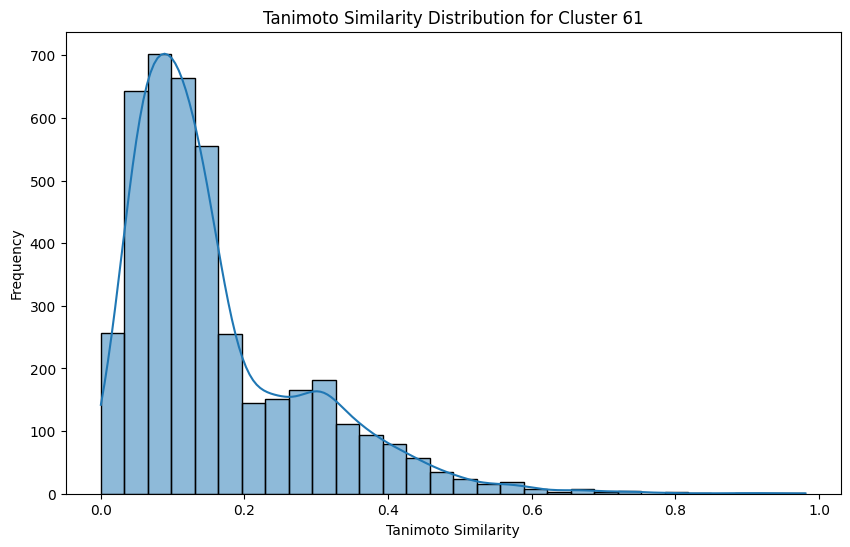

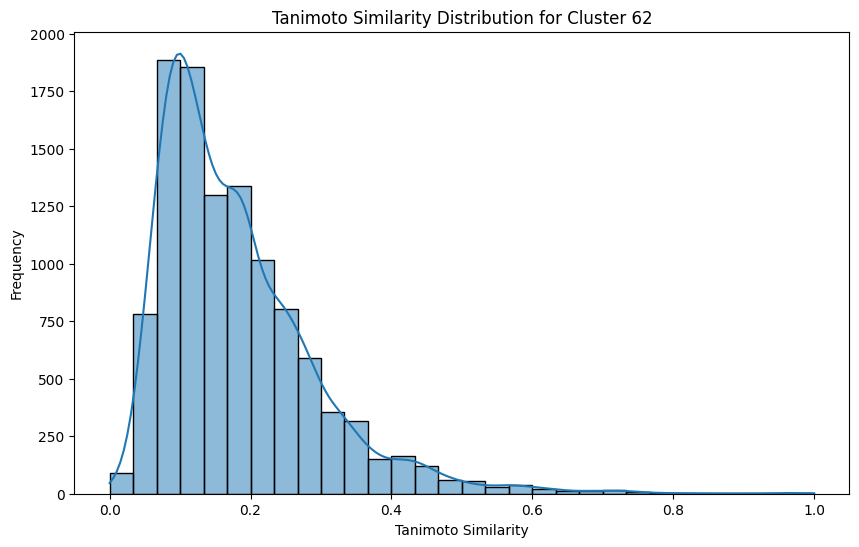

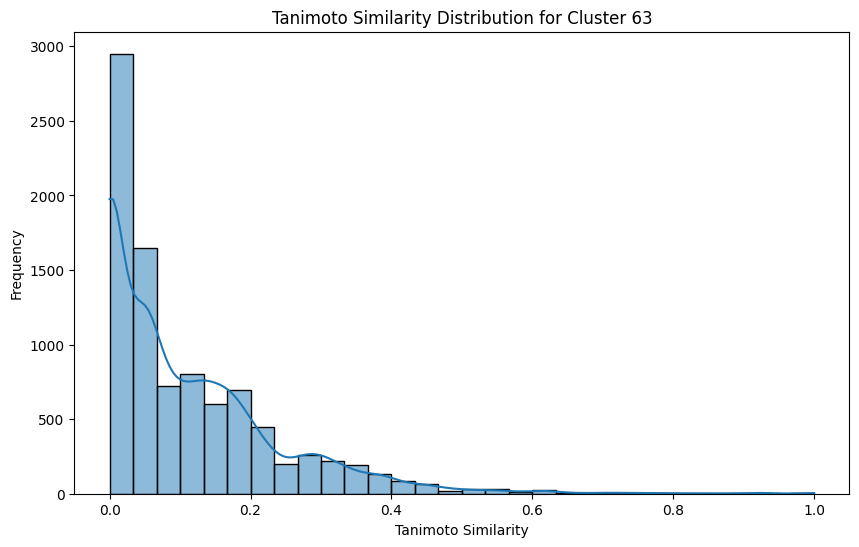

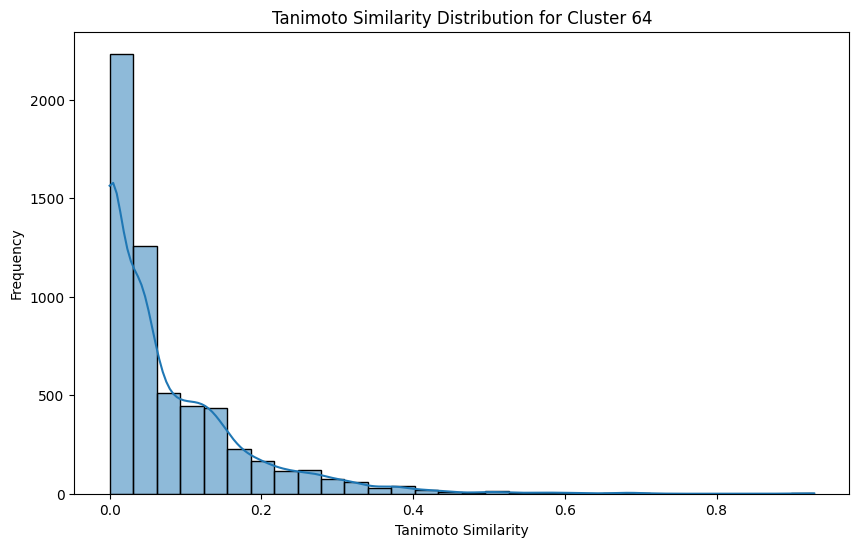

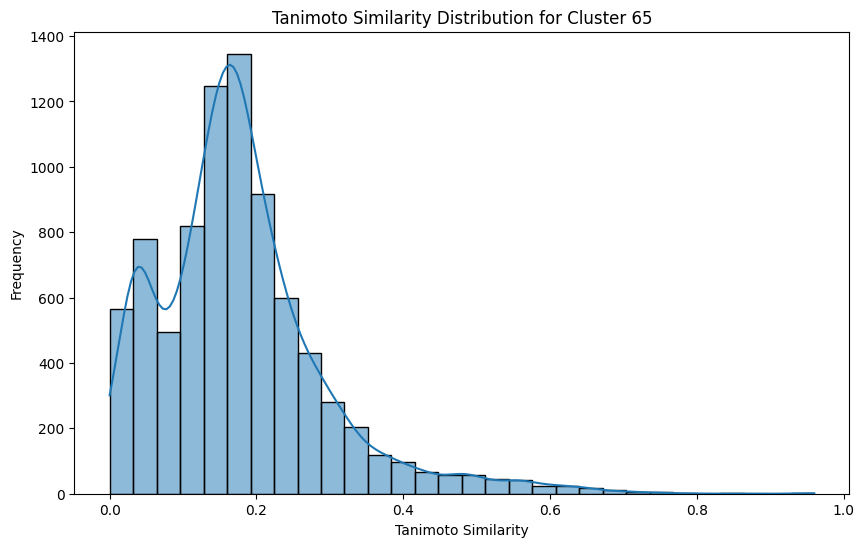

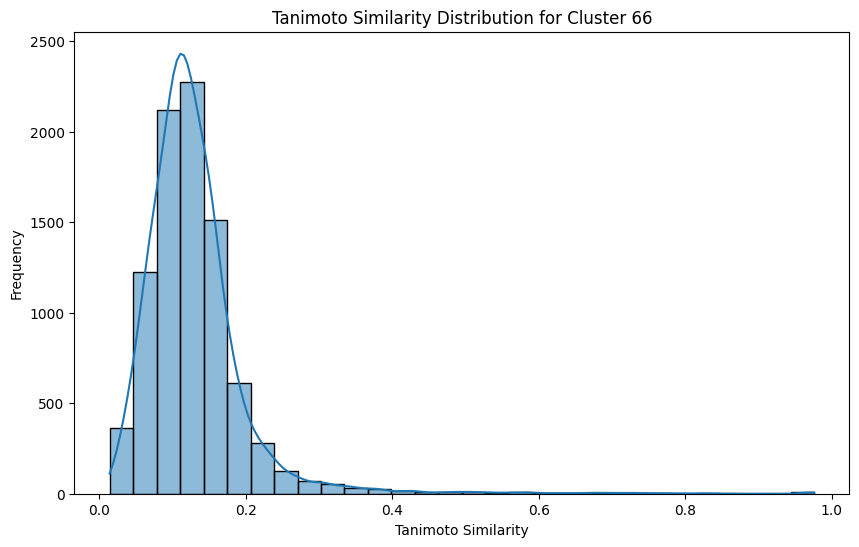

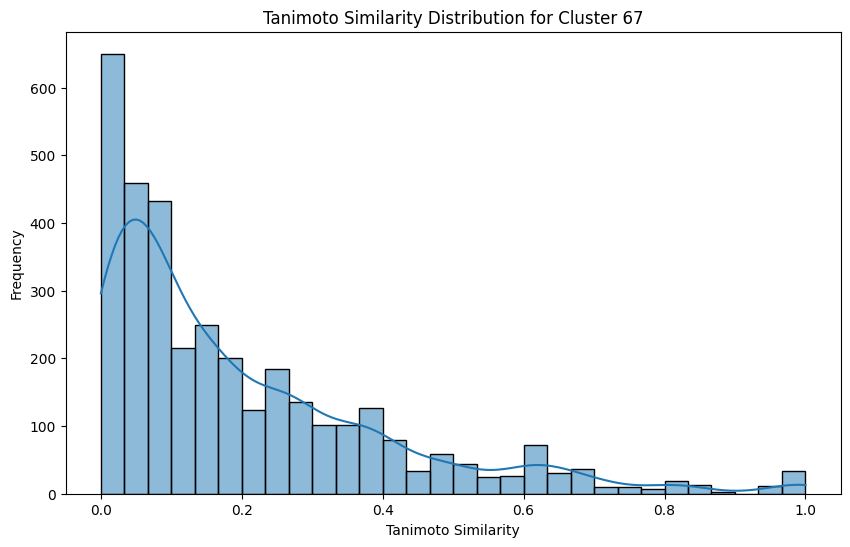

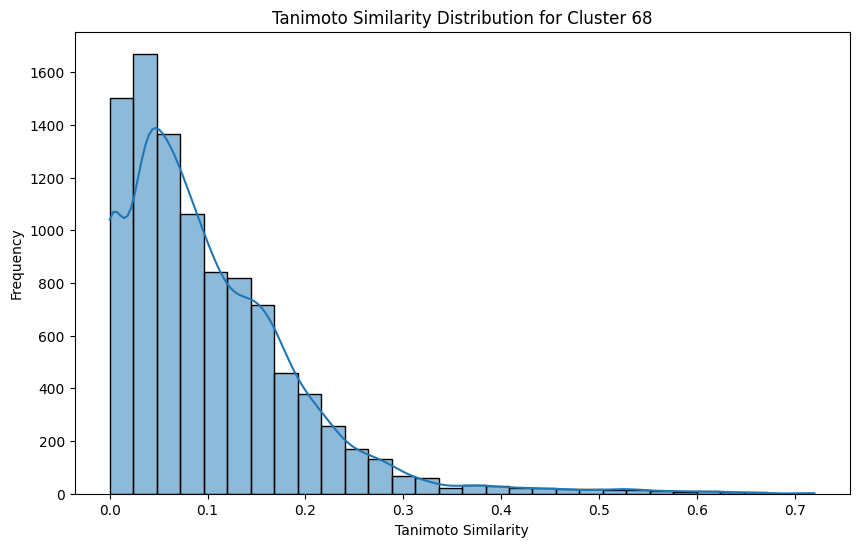

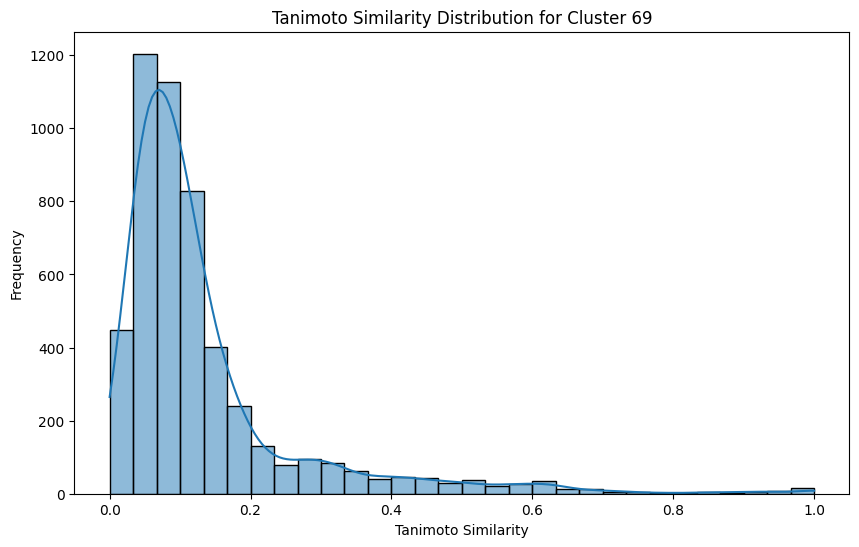

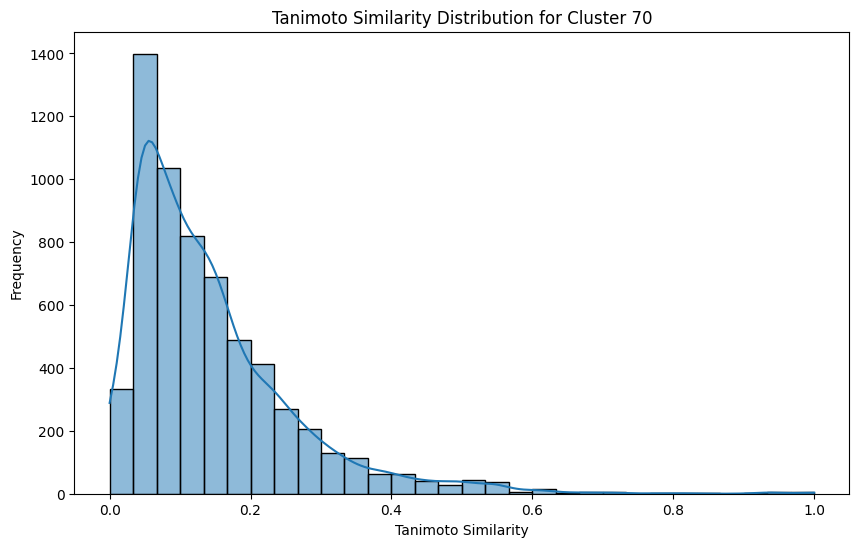

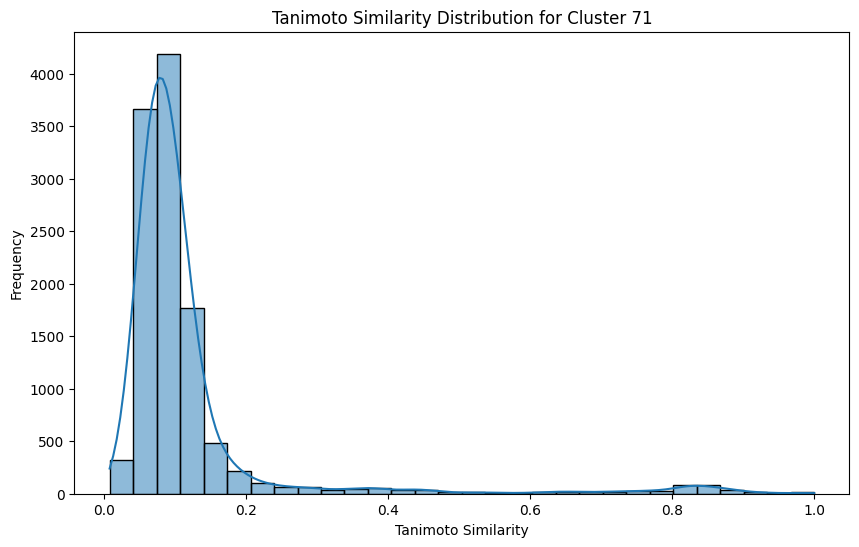

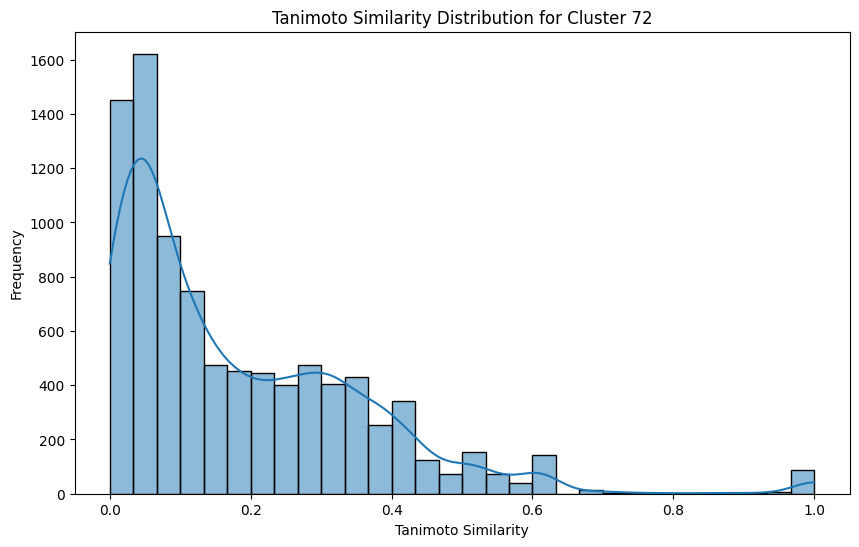

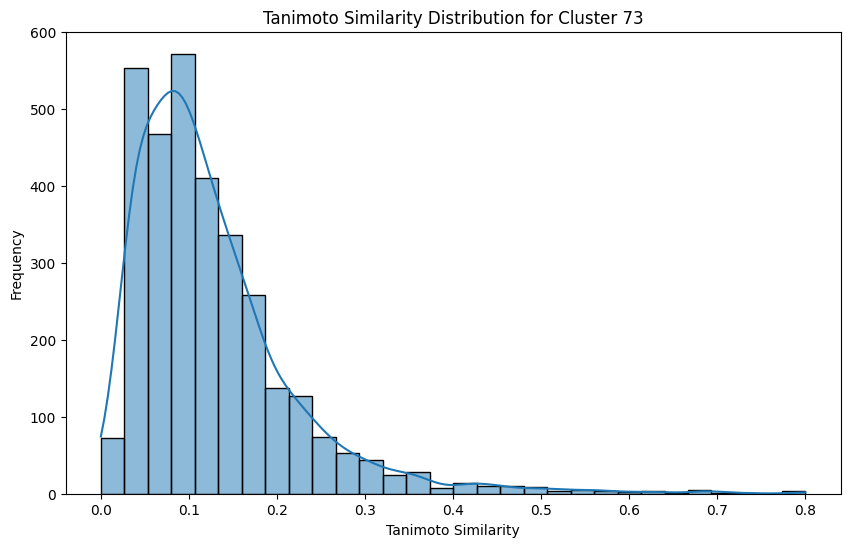

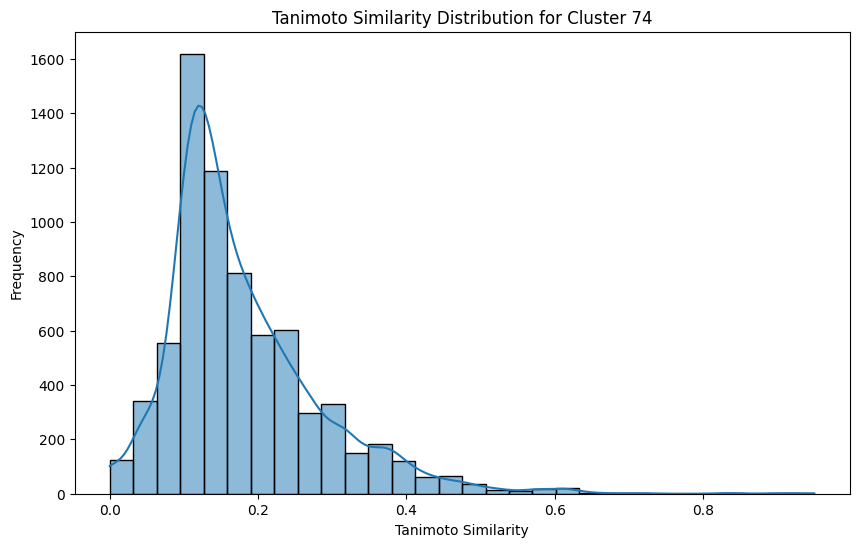

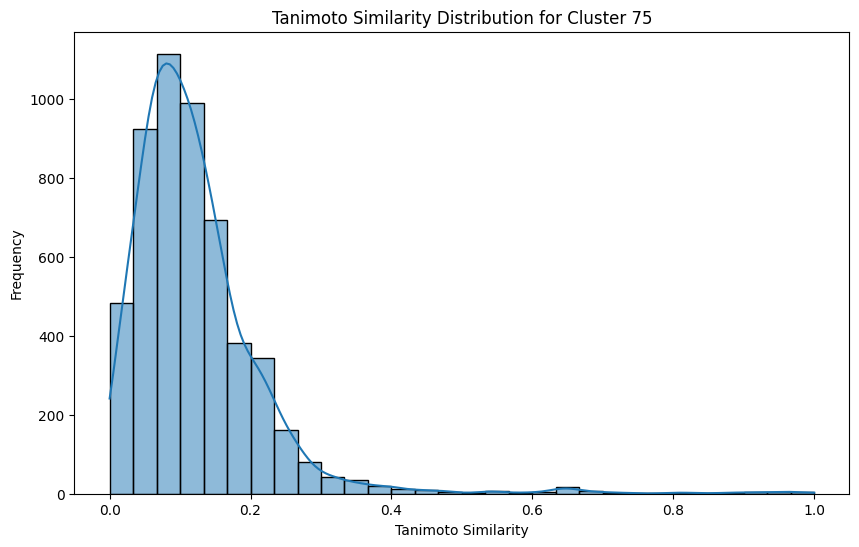

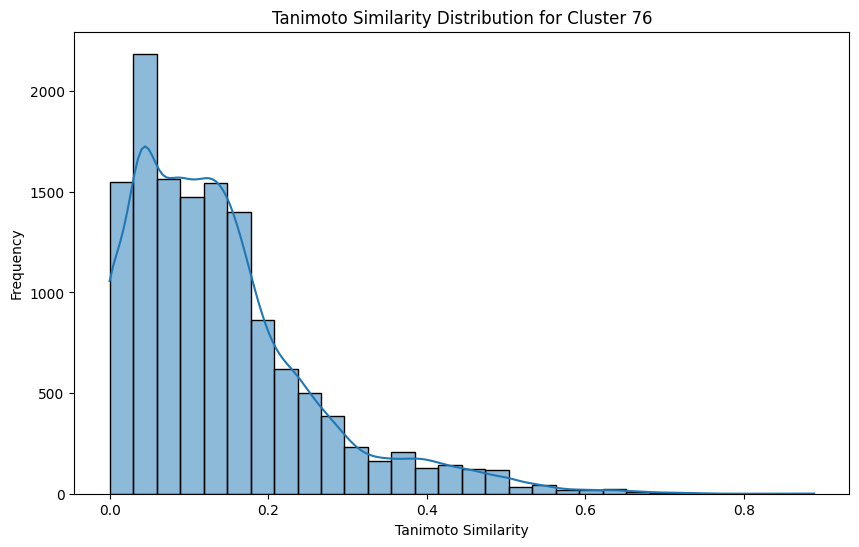

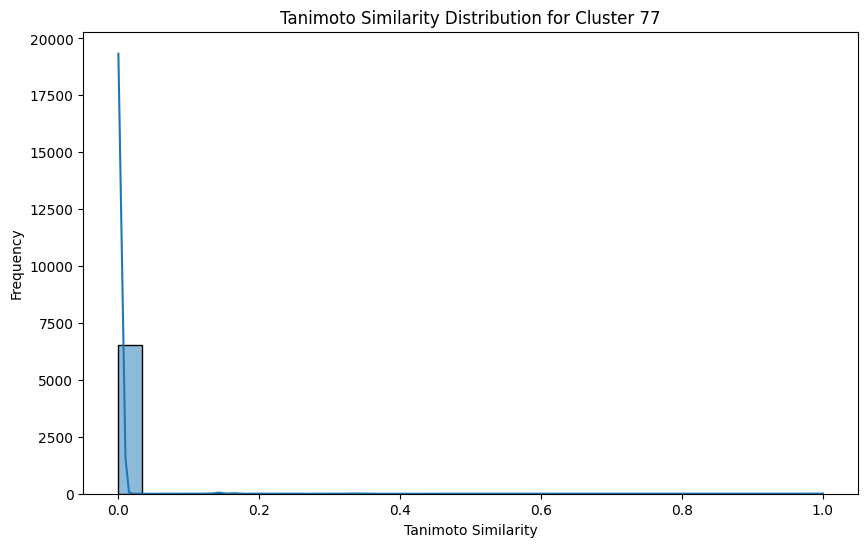

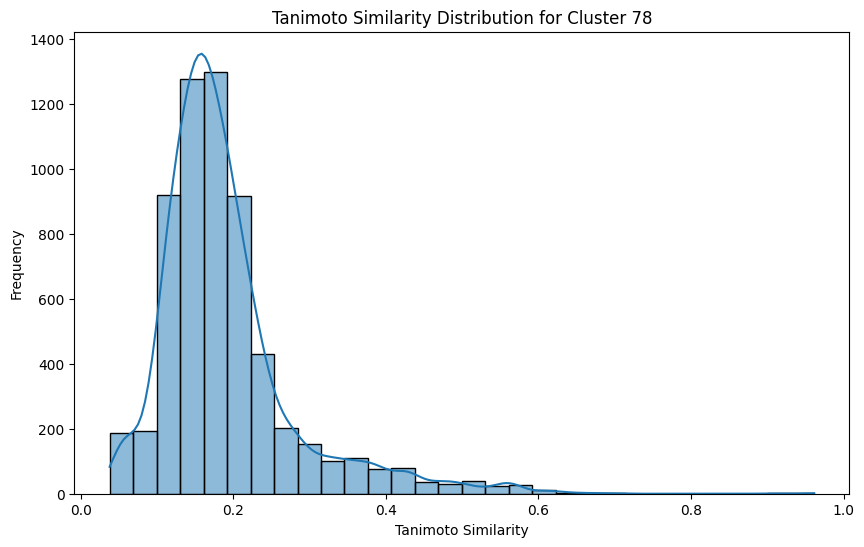

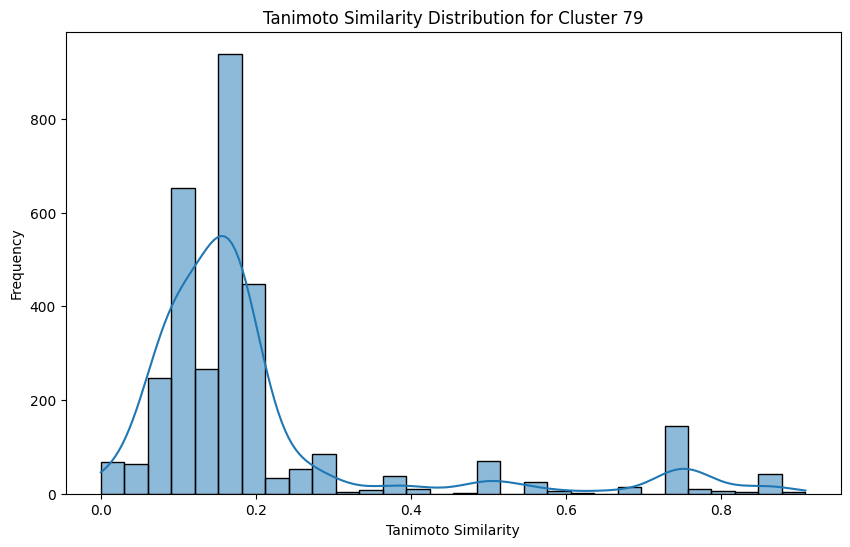

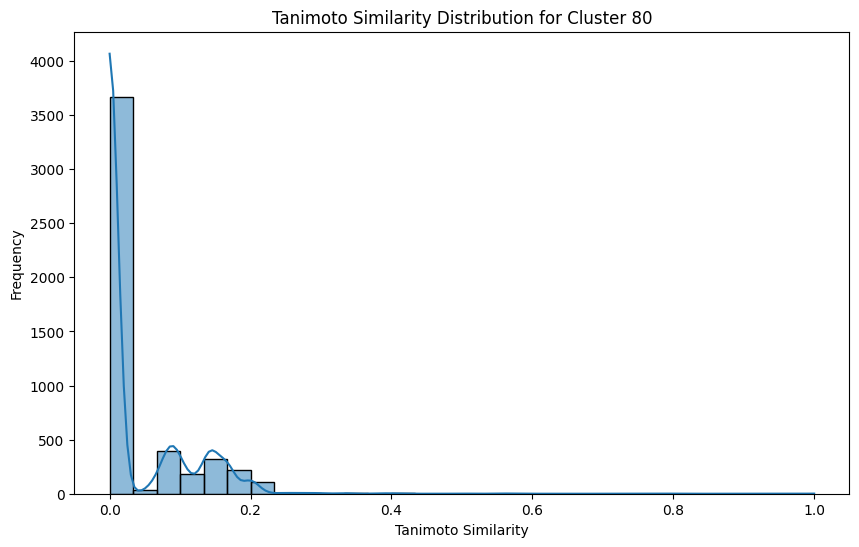

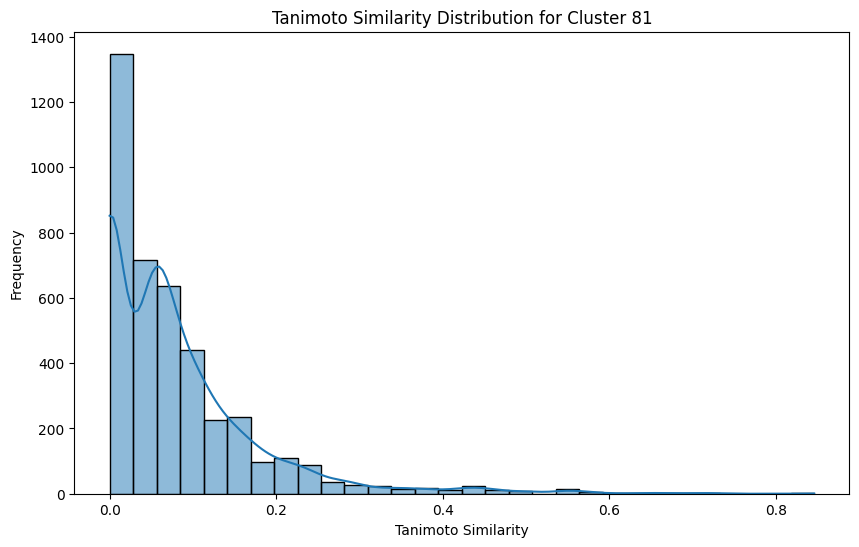

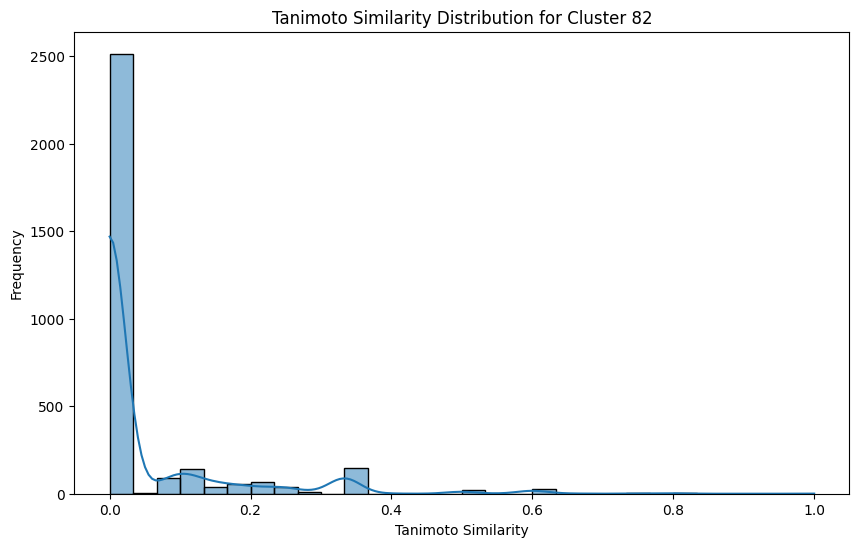

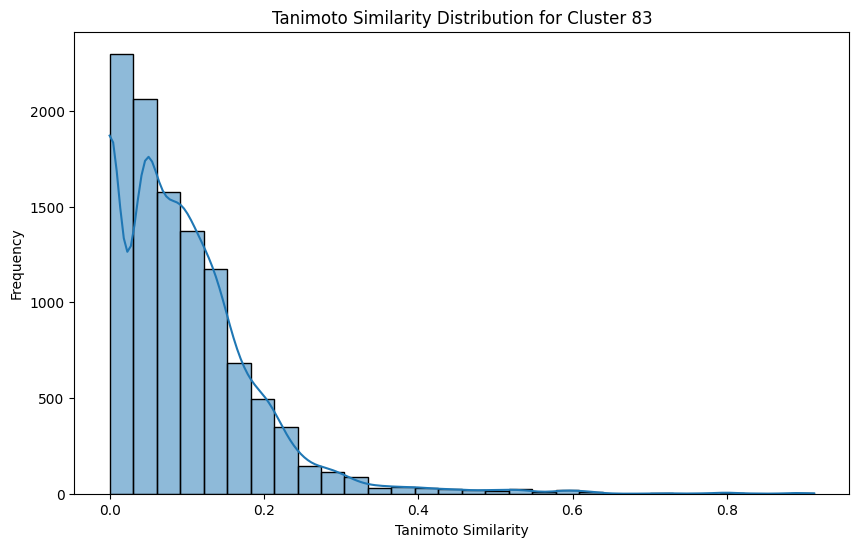

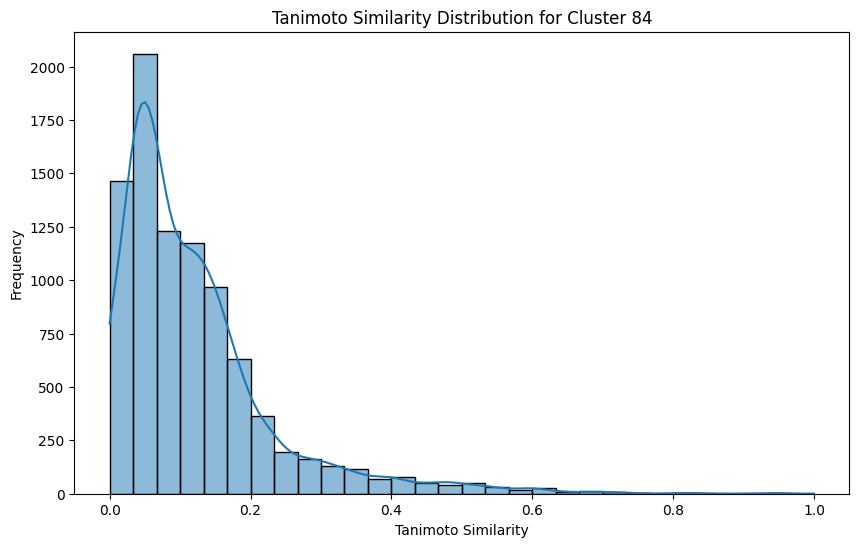

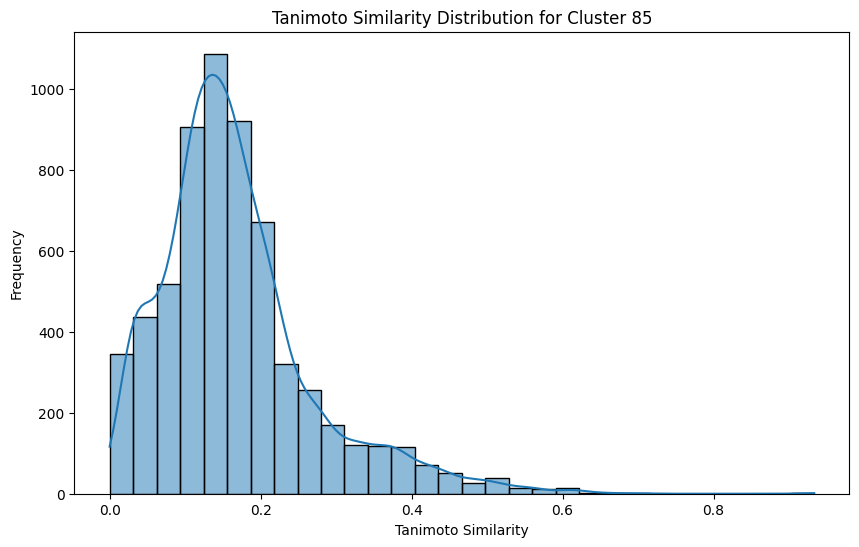

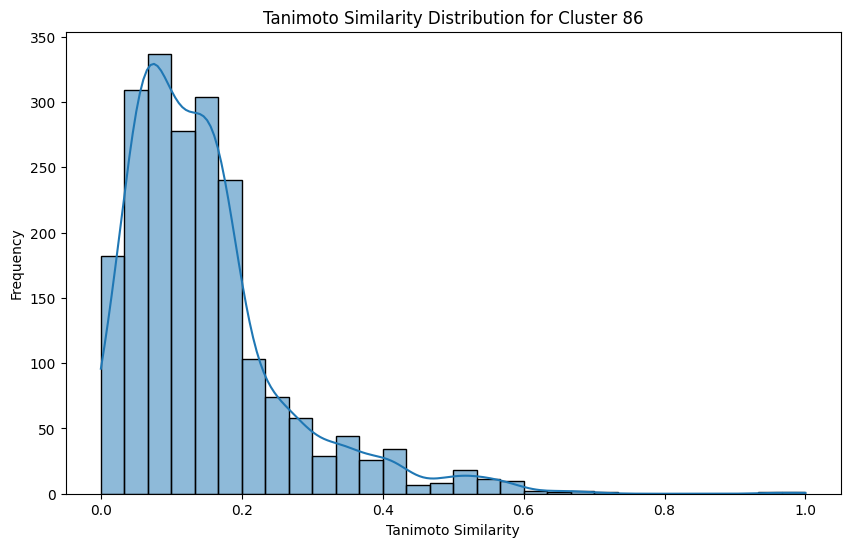

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for label, sims in cluster_similarities.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(sims, bins=30, kde=True)
    plt.title(f'Tanimoto Similarity Distribution for Cluster {label}')
    plt.xlabel('Tanimoto Similarity')
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
silhouette_avg = silhouette_score(1- full_similarity_matrix, labels)#, metric='precomputed')
print(f'Silhouette Score: {silhouette_avg:.4f}')


Silhouette Score: 0.1726


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

def compute_tanimoto_similarity(smi1, smi2):
    mol1 = Chem.MolFromSmiles(smi1)
    mol2 = Chem.MolFromSmiles(smi2)
    if mol1 is None or mol2 is None:
        return None
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2, nBits=2048)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 2, nBits=2048)
    return DataStructs.TanimotoSimilarity(fp1, fp2)

unique_labels = np.unique(labels)
full_similarity_matrix = np.zeros((len(smiles_data), len(smiles_data)))


In [ ]:
if not clusters_data:
    print("Clustering failed to converge.")
else:
    covariances = [compute_covariance_matrix(cluster_data) for cluster_data in clusters_data]

    query_point_z_score_normalized = np.array([0.7, 1.9])  # Replace with actual Z-score normalized query point.

    distances = mahalanobis_distance(query_point_z_score_normalized, clusters_data, covariances)

    ranked_cluster_indices = np.argsort(distances)

    num_clusters = plot_clusters(X, clustering, clusters_data, query_point_z_score_normalized, ranked_cluster_indices)

    closest_cluster_index = ranked_cluster_indices[0]

    closest_cluster_data = clusters_data[closest_cluster_index]

    closest_cluster_smiles_indices = np.where(clustering == closest_cluster_index)[0]

    closest_cluster_smiles = [smiles_data[idx] for idx in closest_cluster_smiles_indices]

    closest_cluster = []

    print("\nOriginal Smiles in Closest Cluster:")
    for smiles in closest_cluster_smiles:
        closest_cluster.append(smiles)
        print(smiles + "\n" + "\n" + "\n" + "\n")

    cmap = plt.get_cmap('tab20', num_clusters)
    plt.figure(figsize=(15, 15))
    plt.scatter(closest_cluster_data[:, 0], closest_cluster_data[:, 1], c=cmap(closest_cluster_index),
                s=70, alpha=0.7, edgecolors='k')
    plt.scatter(query_point_z_score_normalized[0], query_point_z_score_normalized[1], marker='D', color='red', s=100,
                label='Query Point')
    plt.scatter(trim_mean(closest_cluster_data, proportiontocut=0.1, axis=0)[0],
                trim_mean(closest_cluster_data, proportiontocut=0.1, axis=0)[1], marker='o', s=150,
                label=f'Cluster {closest_cluster_index + 1}')
    plt.plot([query_point_z_score_normalized[0], trim_mean(closest_cluster_data, proportiontocut=0.1, axis=0)[0]],
             [query_point_z_score_normalized[1], trim_mean(closest_cluster_data, proportiontocut=0.1, axis=0)[1]],
             color='gray', linestyle='--')
    plt.title("Closest Cluster Visualization with Line", fontsize=16)
    plt.xlabel("Dimension 1 (Z-score normalized)", fontsize=14)
    plt.ylabel("Dimension 2 (Z-score normalized)", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt

# Function to compute Tanimoto distance matrix
def compute_tanimoto_distances(X):
    dot_product = np.dot(X, X.T)
    norm = np.sum(X**2, axis=1)
    denominator = norm[:, None] + norm - dot_product
    distance_matrix = 1 - (dot_product / denominator)
    return distance_matrix

# Function to pad the SMILES tokens
def pad_smiles(smiles_list, max_length):
    return [smiles + [''] * (max_length - len(smiles)) for smiles in smiles_list]

# Function to compute Tanimoto similarity
def compute_tanimoto_similarity(X, idx1, idx2):
    dot_product = np.dot(X[idx1], X[idx2])
    norm1 = np.sum(X[idx1]**2)
    norm2 = np.sum(X[idx2]**2)
    similarity = dot_product / (norm1 + norm2 - dot_product)
    return similarity

# Main code
if __name__ == "__main__":

    max_length = max(len(smiles) for smiles in smiles_data)
    smiles_tokens = [list(smiles) for smiles in smiles_data]
    padded_smiles_tokens = pad_smiles(smiles_tokens, max_length)

    encoder = OneHotEncoder(sparse_output=True, dtype=int, handle_unknown='ignore')
    one_hot_encoded = encoder.fit_transform(padded_smiles_tokens)

    n_dimensions = 2
    perplexity = 2  # Set perplexity to a value less than the number of samples

    tanimoto_distances = compute_tanimoto_distances(one_hot_encoded.toarray())

    # Ensure the matrix is square
    assert tanimoto_distances.shape[0] == tanimoto_distances.shape[1], "Distance matrix is not square"

    tsne_model = TSNE(n_components=n_dimensions, metric='precomputed', perplexity=perplexity, init='random')
    n_dimensional_points = tsne_model.fit_transform(tanimoto_distances)

    mean_values = np.mean(n_dimensional_points, axis=0)
    std_values = np.std(n_dimensional_points, axis=0)
    z_score_normalized_data = (n_dimensional_points - mean_values) / std_values

    print("Mean of z-score normalized data:", np.mean(z_score_normalized_data, axis=0))
    print("Standard deviation of z-score normalized data:", np.std(z_score_normalized_data, axis=0))

    np.random.seed(42)
    X = z_score_normalized_data

    # Clustering using Affinity Propagation
    clustering = AffinityPropagation(damping=0.8).fit(X)
    labels = clustering.labels_

    # Compute silhouette score
    silhouette_avg = silhouette_score(tanimoto_distances, labels, metric='precomputed')
    print("Silhouette Score: ", silhouette_avg)

    # Extract the first cluster

    # Choose a reference molecule (first molecule in the cluster)
    reference_idx = first_cluster_indices[0]

    # Compute Tanimoto similarities within the first cluster
    similarities = []
    for idx in first_cluster_indices:
        if idx != reference_idx:
            similarity = compute_tanimoto_similarity(one_hot_encoded.toarray(), reference_idx, idx)
            similarities.append(similarity)
            print(f"Tanimoto similarity between reference molecule and molecule {idx}: {similarity}")

    # Plot the similarities
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(similarities)), similarities, color='blue')
    plt.xlabel('Molecule Index in Cluster')
    plt.ylabel('Tanimoto Similarity')
    plt.title('Tanimoto Similarities within the First Cluster')
    plt.show()


In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import AffinityPropagation
import seaborn as sns
import matplotlib.pyplot as plt

# Function to compute Tanimoto distance matrix
def compute_tanimoto_distances(X):
    dot_product = np.dot(X, X.T)
    norm = np.sum(X**2, axis=1)
    denominator = norm[:, None] + norm - dot_product
    distance_matrix = 1 - (dot_product / denominator)
    return distance_matrix

# Function to pad the SMILES tokens
def pad_smiles(smiles_list, max_length):
    return [smiles + [''] * (max_length - len(smiles)) for smiles in smiles_list]

# Function to calculate the size of each cluster
def cluster_sizes(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    return dict(zip(unique_labels, counts))

# Function to compute average Tanimoto similarity within and between clusters
def compute_average_tanimoto_similarities(tanimoto_matrix, labels):
    unique_labels = np.unique(labels)
    num_clusters = len(unique_labels)

    within_cluster_similarities = {}
    between_cluster_similarities = np.zeros((num_clusters, num_clusters))

    for i, label in enumerate(unique_labels):
        indices = np.where(labels == label)[0]
        cluster_matrix = tanimoto_matrix[np.ix_(indices, indices)]
        within_cluster_similarities[label] = np.mean(cluster_matrix)

    for i, label_i in enumerate(unique_labels):
        for j, label_j in enumerate(unique_labels):
            if i <= j:
                indices_i = np.where(labels == label_i)[0]
                indices_j = np.where(labels == label_j)[0]
                inter_cluster_matrix = tanimoto_matrix[np.ix_(indices_i, indices_j)]
                between_cluster_similarities[i, j] = np.mean(inter_cluster_matrix)
                between_cluster_similarities[j, i] = between_cluster_similarities[i, j]

    return within_cluster_similarities, between_cluster_similarities

# Main code
if __name__ == "__main__":
    smiles_data = smiles_data[:100]
    max_length = max(len(smiles) for smiles in smiles_data)
    smiles_tokens = [list(smiles) for smiles in smiles_data]
    padded_smiles_tokens = pad_smiles(smiles_tokens, max_length)

    encoder = OneHotEncoder(sparse_output=False, dtype=int, handle_unknown='ignore')
    one_hot_encoded = encoder.fit_transform(padded_smiles_tokens)

    n_dimensions = 2
    perplexity = 2  # Set perplexity to a value less than the number of samples

    tanimoto_distances = compute_tanimoto_distances(one_hot_encoded)

    # Ensure the matrix is square
    assert tanimoto_distances.shape[0] == tanimoto_distances.shape[1], "Distance matrix is not square"

    tsne_model = TSNE(n_components=n_dimensions, metric='precomputed', perplexity=perplexity, init='random')
    n_dimensional_points = tsne_model.fit_transform(tanimoto_distances)

    mean_values = np.mean(n_dimensional_points, axis=0)
    std_values = np.std(n_dimensional_points, axis=0)
    z_score_normalized_data = (n_dimensional_points - mean_values) / std_values

    print("Mean of z-score normalized data:", np.mean(z_score_normalized_data, axis=0))
    print("Standard deviation of z-score normalized data:", np.std(z_score_normalized_data, axis=0))

    np.random.seed(42)
    X = z_score_normalized_data

    # Clustering using Affinity Propagation
    clustering = AffinityPropagation(damping=0.8).fit(X)
    labels = clustering.labels_

    # Compute silhouette score
    silhouette_avg = silhouette_score(tanimoto_distances, labels, metric='precomputed')
    print("Silhouette Score: ", silhouette_avg)

    # List the size of each cluster
    cluster_size_dict = cluster_sizes(labels)
    print("Cluster Sizes:", cluster_size_dict)

    # Compute average Tanimoto similarities
    within_cluster_similarities, between_cluster_similarities = compute_average_tanimoto_similarities(tanimoto_distances, labels)
    print("Within Cluster Similarities:", within_cluster_similarities)
    print("Between Cluster Similarities:\n", between_cluster_similarities)

    # Plot the Tanimoto similarity matrix with clusters highlighted
    plot_tanimoto_similarity_matrix(tanimoto_distances, labels)


In [ ]:
    num_clusters = plot_clusters(X, cluster_centers_indices, clusters_data, None, None)

    print("Number of Clusters:", num_clusters)

In [ ]:
   if not clusters_data:
        print("Clustering failed to converge.")
    else:
        covariances = [compute_covariance_matrix(cluster_data) for cluster_data in clusters_data]

        query_point_z_score_normalized = np.array([0.7, 1.9])  # Replace with actual Z-score normalized query point.

        distances = mahalanobis_distance(query_point_z_score_normalized, clusters_data, covariances)

        ranked_cluster_indices = np.argsort(distances)

        num_clusters = plot_clusters(X, cluster_centers_indices, clusters_data, query_point_z_score_normalized, ranked_cluster_indices)

        closest_cluster_index = ranked_cluster_indices[0]

        closest_cluster_data = clusters_data[closest_cluster_index]

        closest_cluster_smiles_indices = np.where(cluster_centers_indices == closest_cluster_index)[0]

        closest_cluster_smiles = [smiles_data[idx] for idx in closest_cluster_smiles_indices]

        closest_cluster = []

        print("\nOriginal Smiles in Closest Cluster:")
        for smiles in closest_cluster_smiles:
            closest_cluster.append(smiles)
            print(smiles + "\n" + "\n" + "\n" + "\n")

        cmap = plt.get_cmap('tab20', num_clusters)
        plt.figure(figsize=(15, 15))
        plt.scatter(closest_cluster_data[:, 0], closest_cluster_data[:, 1], c=cmap(closest_cluster_index),
                    s=70, alpha=0.7, edgecolors='k')
        plt.scatter(query_point_z_score_normalized[0], query_point_z_score_normalized[1], marker='D', color='red', s=100,
                    label='Query Point')
        plt.scatter(trim_mean(closest_cluster_data, proportiontocut=0.1, axis=0)[0],
                    trim_mean(closest_cluster_data, proportiontocut=0.1, axis=0)[1], marker='o', s=150,
                    label=f'Cluster {closest_cluster_index + 1}')
        plt.plot([query_point_z_score_normalized[0], trim_mean(closest_cluster_data, proportiontocut=0.1, axis=0)[0]],
                [query_point_z_score_normalized[1], trim_mean(closest_cluster_data, proportiontocut=0.1, axis=0)[1]],
                color='gray', linestyle='--')
        plt.title("Closest Cluster Visualization with Line", fontsize=16)
        plt.xlabel("Dimension 1 (Z-score normalized)", fontsize=14)
        plt.ylabel("Dimension 2 (Z-score normalized)", fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(fontsize=12)
        plt.tight_layout()
        plt.show()

In [ ]:
closest_cluster

#Tanimoto Accuracy Calculation

In [ ]:
#MACCS
from rdkit import Chem
from rdkit.Chem import MACCSkeys

def calculate_tanimoto_coefficient(smiles1, smiles2):
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)

    if mol1 is None or mol2 is None:
        raise ValueError("Invalid SMILES string provided.")

    maccs1 = MACCSkeys.GenMACCSKeys(mol1)
    maccs2 = MACCSkeys.GenMACCSKeys(mol2)

    common_bits = maccs1 & maccs2
    all_bits = maccs1 | maccs2
    tanimoto_coefficient = sum(common_bits) / sum(all_bits)

    return tanimoto_coefficient

def calculate_tanimoto_coefficients_for_first(smiles_list):
    if len(smiles_list) < 2:
        raise ValueError("List must contain at least two SMILES strings.")

    reference_smiles = smiles_list[0] #Testing Against the Whole cluster
    print("Reference molecule SMILES:", reference_smiles)

    tanimoto_coefficients = []

    for idx, smiles in enumerate(smiles_list[1:], start=1):
        tanimoto_coefficient = calculate_tanimoto_coefficient(reference_smiles, smiles)
        print(f"Tanimoto Coefficient with molecule {idx}: {tanimoto_coefficient:.4f}")
        tanimoto_coefficients.append(tanimoto_coefficient)

    return tanimoto_coefficients

smiles_list = closest_cluster
coefficients_list = calculate_tanimoto_coefficients_for_first(smiles_list)
print("Tanimoto Coefficients List:", coefficients_list)

In [ ]:
#Visualization
import matplotlib.pyplot as plt
import numpy as np

def visualize_tanimoto_coefficients(smiles_list, tanimoto_coefficients):
    x_labels = [f"Molecule {i}" for i in range(2, len(smiles_list) + 1)]
    y_values = tanimoto_coefficients

    plt.figure(figsize=(10, 6))
    plt.bar(x_labels, y_values, color='blue')
    plt.xlabel('Molecule')
    plt.ylabel('Tanimoto Coefficient')
    plt.title('Tanimoto Coefficients with Reference Molecule')
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


smiles_list = closest_cluster
tanimoto_coefficients = coefficients_list

visualize_tanimoto_coefficients(smiles_list, tanimoto_coefficients)


#Summary Statistics for Tanimoto Accuracy Set

In [ ]:
data = coefficients_list

mean = np.mean(data)
median = np.median(data)
std_deviation = np.std(data)
variance = np.var(data)
min_value = np.min(data)
max_value = np.max(data)
range_value = np.ptp(data)
count = len(data)

print("Summary Statistics:")
print(f"Data: {data}")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance}")
print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")
print(f"Range: {range_value}")
print(f"Count: {count}")

labels = ['Mean', 'Median', 'Std Dev', 'Variance', 'Min', 'Max', 'Range']
values = [mean, median, std_deviation, variance, min_value, max_value, range_value]

plt.figure(figsize=(15, 15))
plt.bar(labels, values, color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink'])
plt.title('Summary Statistics')
plt.ylabel('Value')
plt.show()